In [1]:
import asyncio
from hud import gym
from hud.agent import OperatorAgent  # Replace with an agent that can achieve the task
from hud import create_job, load_taskset

from hud.types import CustomGym
from pathlib import Path
from hud.task import Task
from hud.taskset import TaskSet

from dotenv import load_dotenv
import os
import json
import pprint
from openai import AsyncOpenAI

load_dotenv()
assert os.environ.get("HUD_API_KEY")
assert os.environ.get("OPENAI_API_KEY")

In [2]:
taskset = await load_taskset("hud-appflowy-taskset-368-final")
print(f"Number of tasks: {len(taskset)}")

first_task = taskset[0]
pprint.pprint(first_task.__dict__)

Number of tasks: 368
{'config': None,
 'description': None,
 'evaluate': FunctionConfig(function='grade', args=['rockbnb-add-richmond-property'], id=None, metadata=None),
 'gym': CustomGym(type='public', location='remote', image_or_build_context='156041433621.dkr.ecr.us-east-1.amazonaws.com/docker-gym:6f368c40-4812-44b0-8478-730a72d31fdd', host_config=None),
 'id': 'f560b955-a804-4b4e-a31a-43dcae30fa28',
 'metadata': None,
 'prompt': 'We need to expand our Richmond district portfolio. Please add the '
           'Richmond Garden House (identifier PROP-007) to our bookkeeping '
           'system. This 3-bedroom property in the Richmond neighborhood '
           'should be marked as Active with Master-lease host type, occupancy '
           'rate of 0.78, guest rating of 4.72, and scheduled for next '
           'turnover on 2025-05-21 at 14:00.',
 'setup': FunctionConfig(function='setup', args=['rockbnb-add-richmond-property'], id=None, metadata=None)}


In [3]:
# This will take 2-3 minutes to set up the environment. By default this will also start logging results to the HUD server.
env = await gym.make(env_src=first_task)

print("Environment resetting (runs setup)...")
obs, _ = await env.reset()
print(f"Initial observation: {obs}")

client = AsyncOpenAI(api_key=os.environ["OPENAI_API_KEY"])
agent = OperatorAgent(client=client)

Environment resetting (runs setup)...
Initial observation: Observation(screenshot=None, text=We need to expand our Richmond district portfolio. Please add the Richmond Garden House (identifier ...)


========= Step 1 =========
Agent's action: [ScreenshotFetch(type='screenshot', logs={'id': 'resp_6844d9dc92d8819fab92073f12a7000e0512ae7f9cc047fc', 'created_at': 1749342684.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844d9ddd39c819f883415e96575c4be0512ae7f9cc047fc', 'action': {'type': 'screenshot'}, 'call_id': 'call_gHYPWiNh5o2p0Jkqt2CDayhC', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': None, 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status': 'completed', 'text': {'format': {'type': 'text'}}, 't

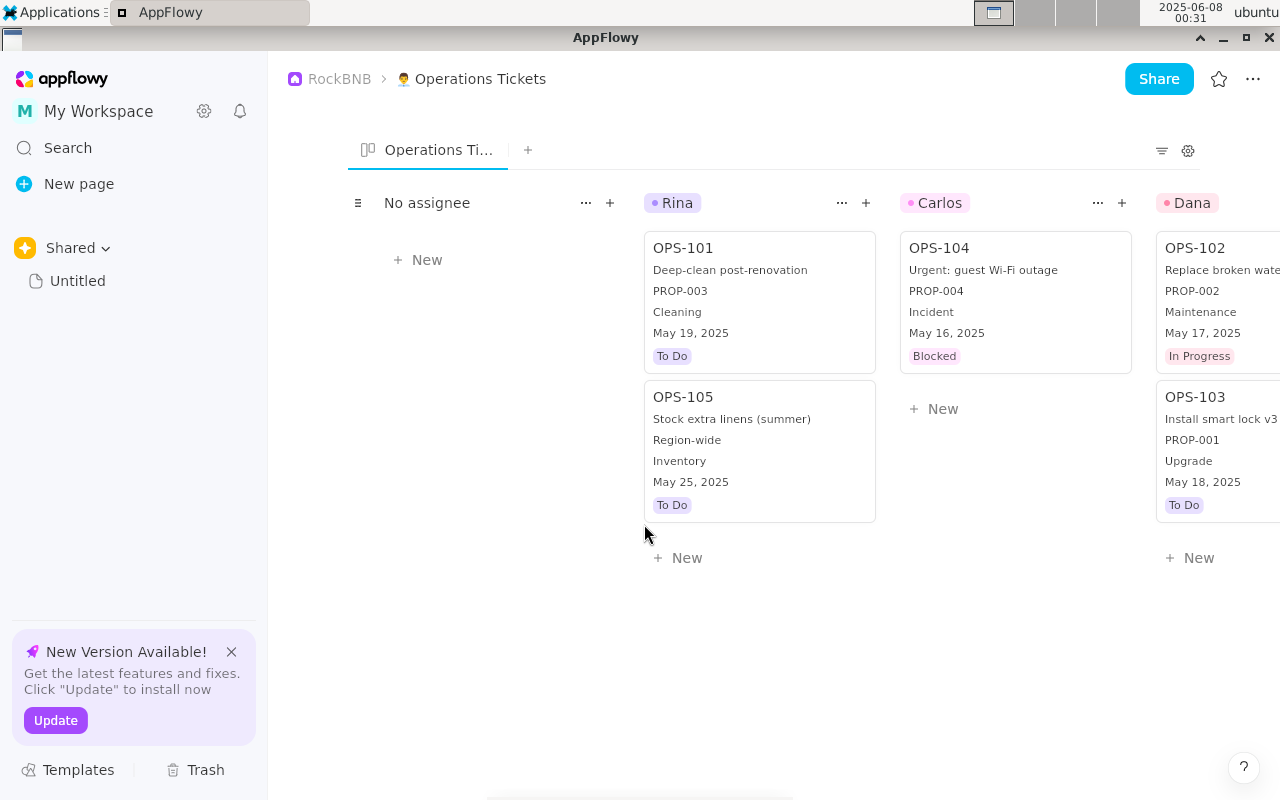

========= Step 2 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844d9e3333c819fbf831935126011270512ae7f9cc047fc', 'created_at': 1749342691.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844d9e61b70819f988a601a6c324d400512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844d9e7a9dc819f8076f73da0973d240512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 228, 'y': 250}, 'call_id': 'call_TY46Z0sUhget1xpers4hrOGp', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_68

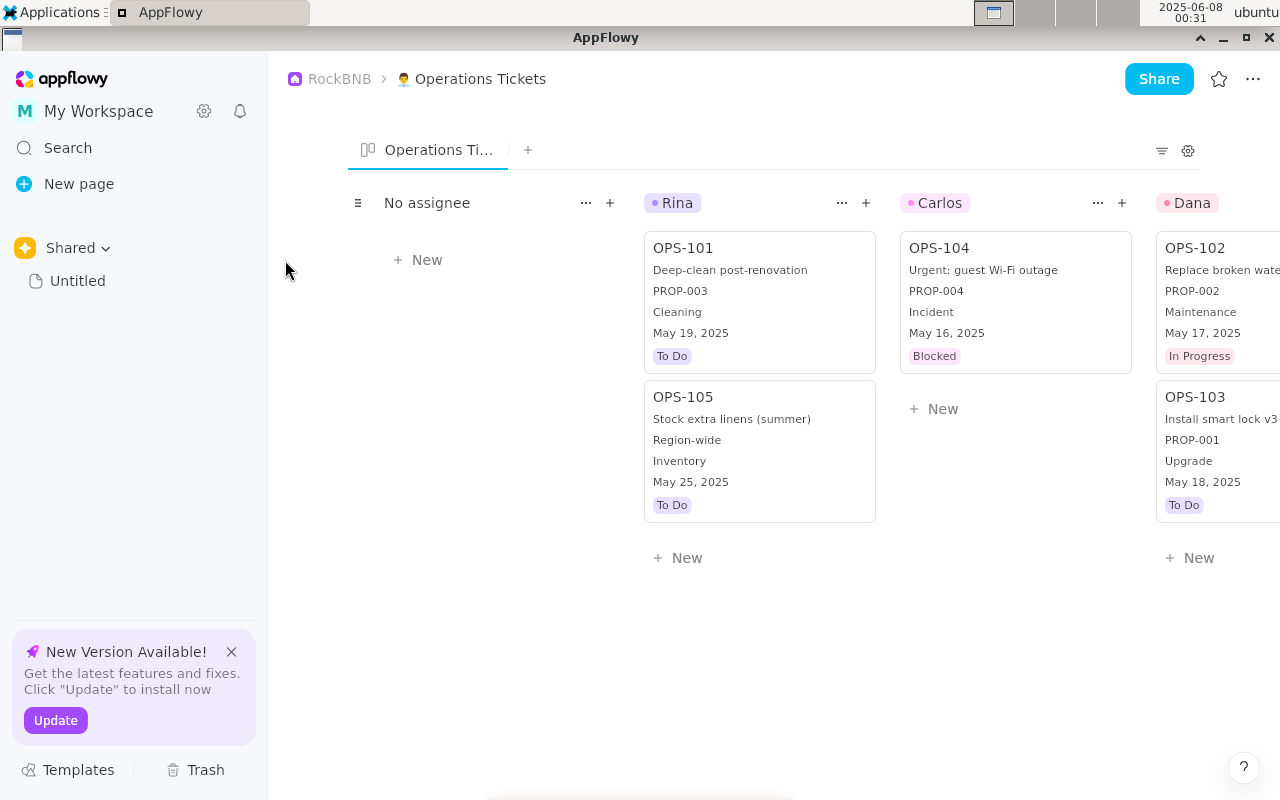

========= Step 3 =========
Agent's action: [WaitAction(type='wait', logs={'id': 'resp_6844d9ee938c819f8a01b218060856920512ae7f9cc047fc', 'created_at': 1749342702.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844d9f15bf4819f9cb139696d7a12790512ae7f9cc047fc', 'action': {'type': 'wait'}, 'call_id': 'call_ODioRC7hnu29rwc1cdkWO53u', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844d9e3333c819fbf831935126011270512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status': 'completed', 'text'

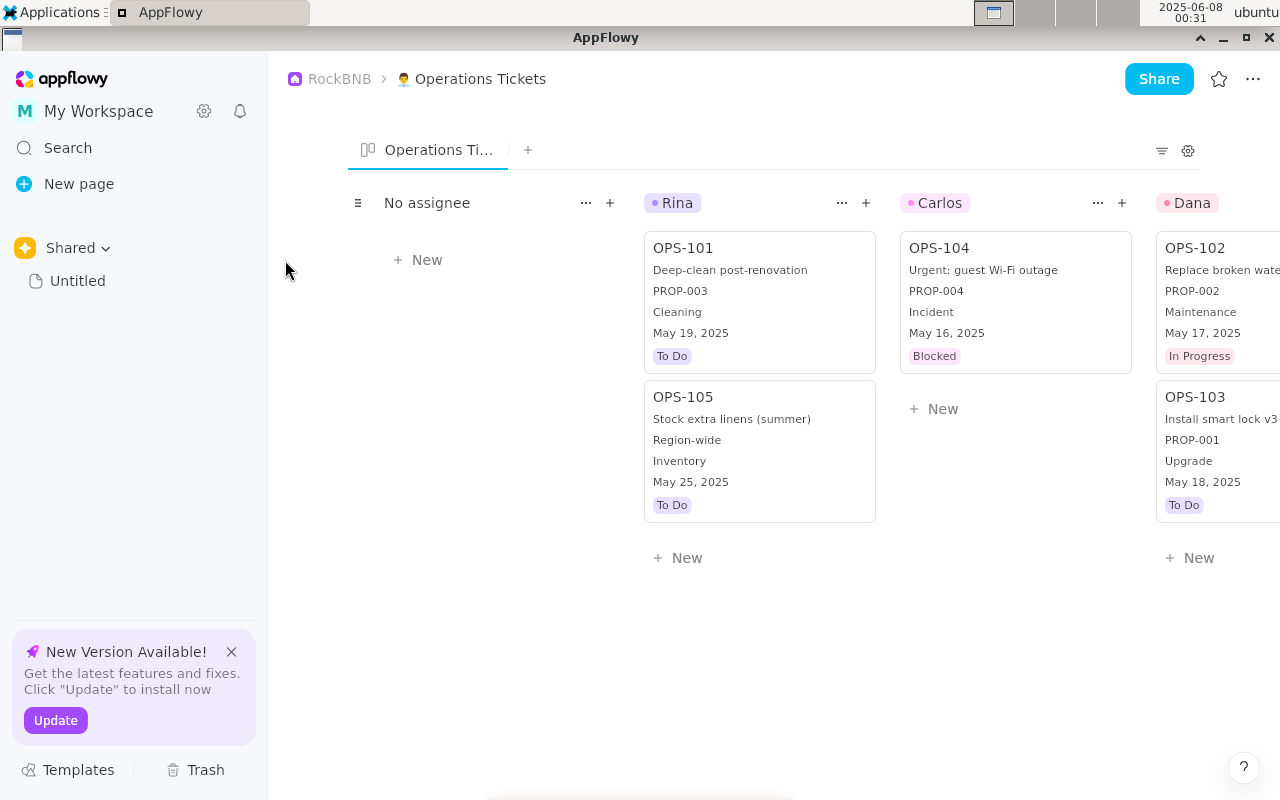

========= Step 4 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844d9f7ae88819fb43adfa188c3f7040512ae7f9cc047fc', 'created_at': 1749342711.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844d9fa3c78819f984d63ed0de314f40512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844d9fb1818819f86c4832bb206a35c0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 260, 'y': 77}, 'call_id': 'call_tB3B4yui9lZOiLmx1y7c6X7f', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_684

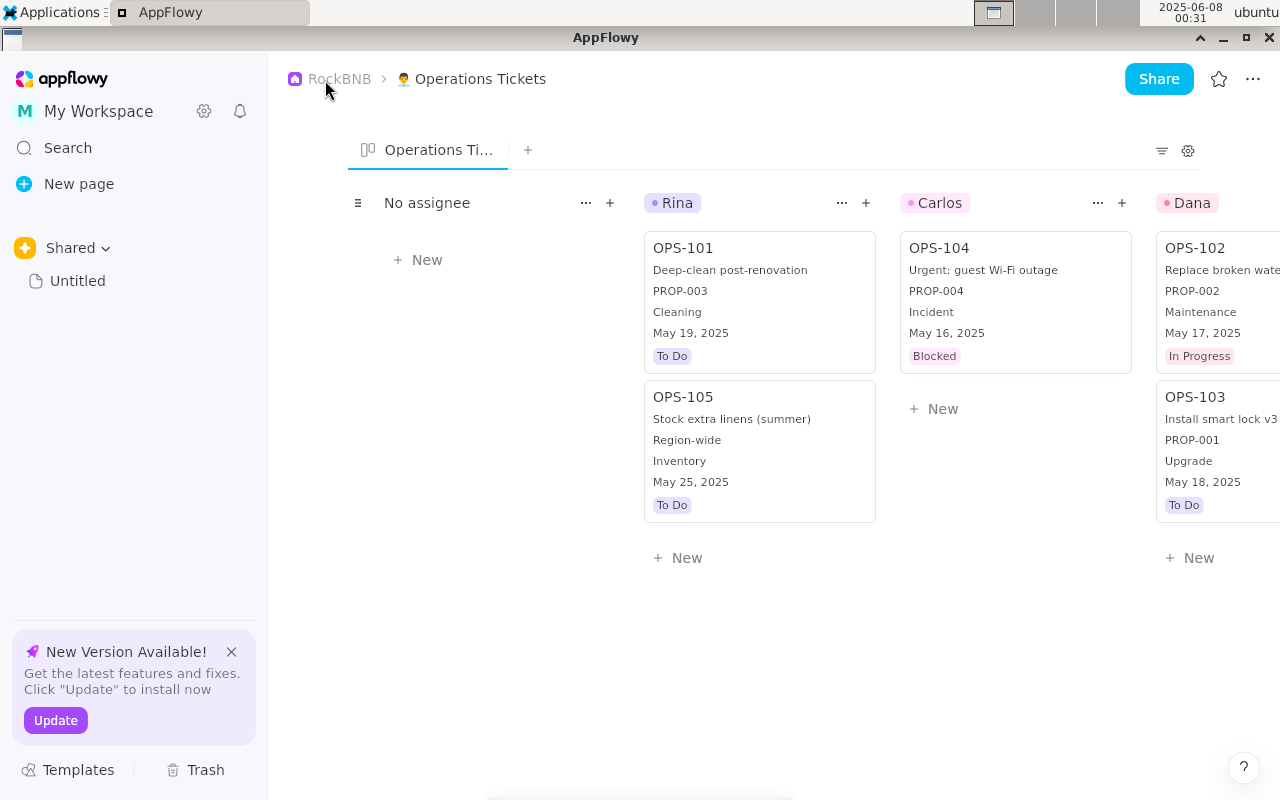

========= Step 5 =========
Agent's action: [WaitAction(type='wait', logs={'id': 'resp_6844da01f1c4819f88366907dd50c9770512ae7f9cc047fc', 'created_at': 1749342722.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844da04fc64819f8c02153d2ba1c00e0512ae7f9cc047fc', 'action': {'type': 'wait'}, 'call_id': 'call_eQrbW2ayCvbeokkRlS2hVQ3v', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844d9f7ae88819fb43adfa188c3f7040512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status': 'completed', 'text'

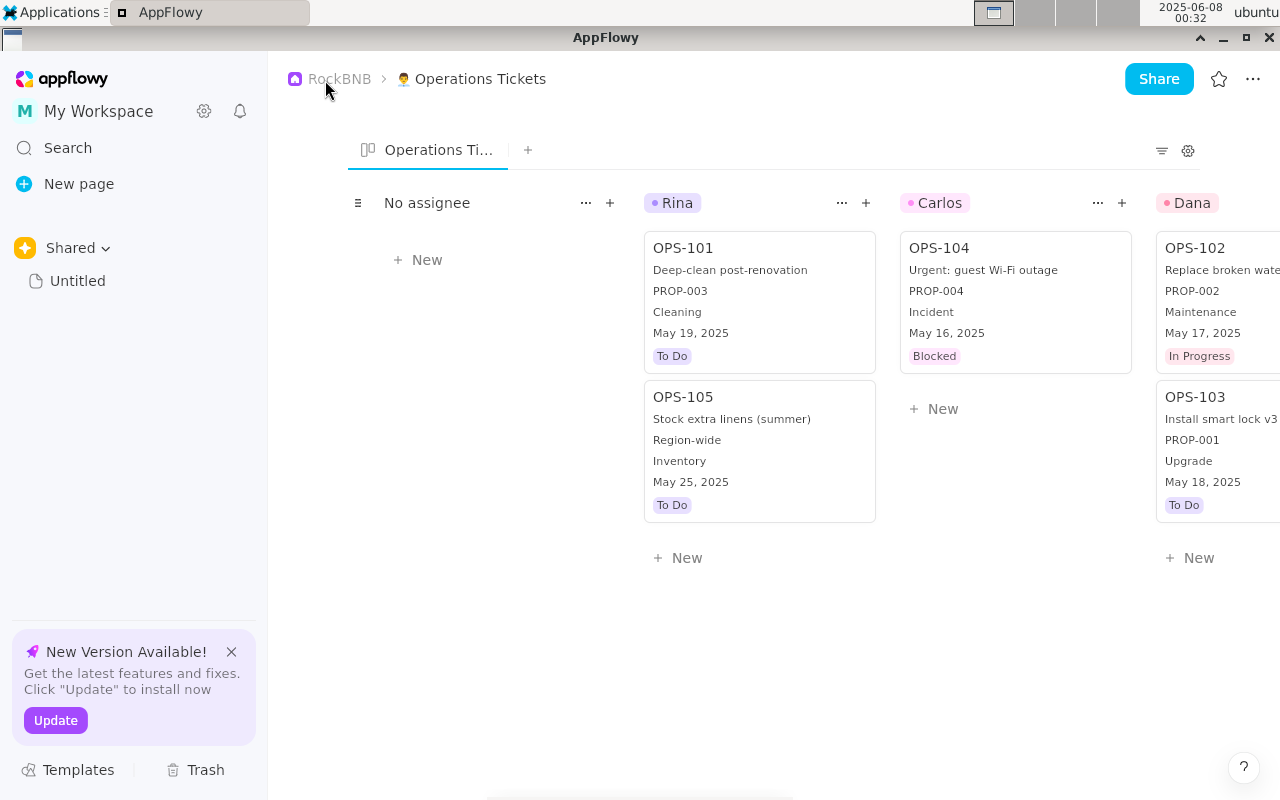

========= Step 6 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844da0b52e0819faaabe817b0406a700512ae7f9cc047fc', 'created_at': 1749342731.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da0e8994819f8b5b27d28dfd23010512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da0f7778819f92506d9f8af50fab0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 43, 'y': 141}, 'call_id': 'call_Hsbmd0lnPthW7lfkXEPwTtqw', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_684

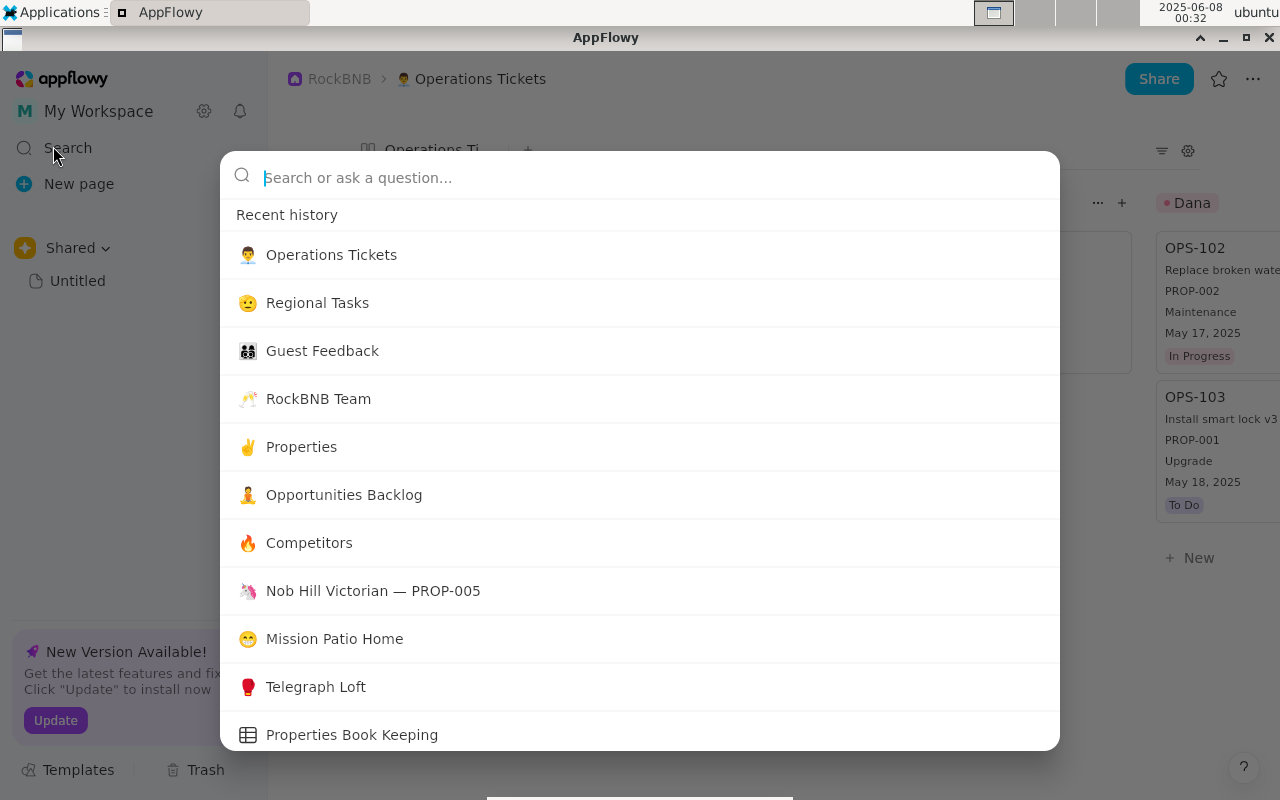

========= Step 7 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844da172988819fa3be1fbc0a7513850512ae7f9cc047fc', 'created_at': 1749342743.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da1aa93c819f875f0b1b091631dc0512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da1b5b78819fb4ad2f1b479aa3ef0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 247, 'y': 430}, 'call_id': 'call_Q3pMAwA5WojikP06JM3A7SHx', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_68

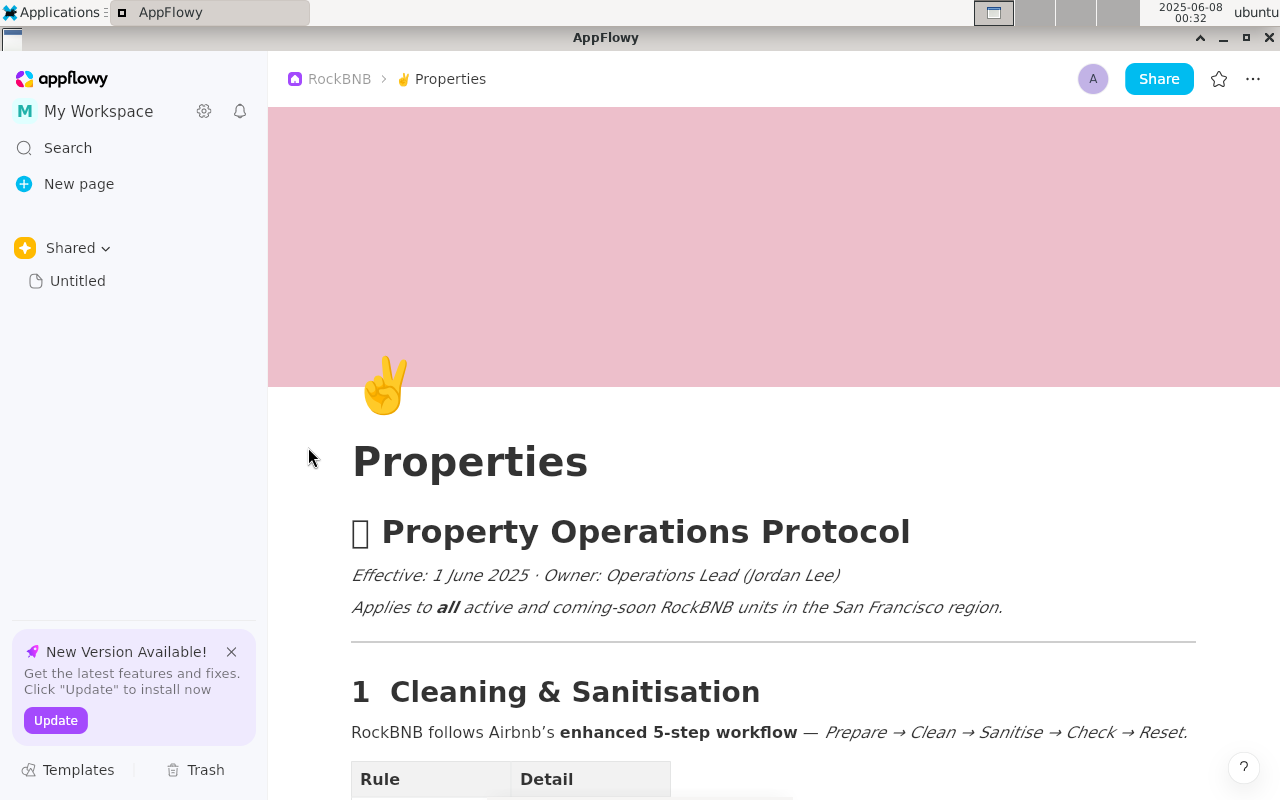

========= Step 8 =========
Agent's action: [ScrollAction(type='scroll', logs={'id': 'resp_6844da21fdfc819f90bba6f612ca19560512ae7f9cc047fc', 'created_at': 1749342754.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da262cd8819f96734cb88df78db30512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da26fb48819fbc9f9337cca4c4f70512ae7f9cc047fc', 'action': {'scroll_x': 0, 'scroll_y': 598, 'type': 'scroll', 'x': 534, 'y': 726}, 'call_id': 'call_o1rIAJL4KhKw7yB6YGiy22r4', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_respo

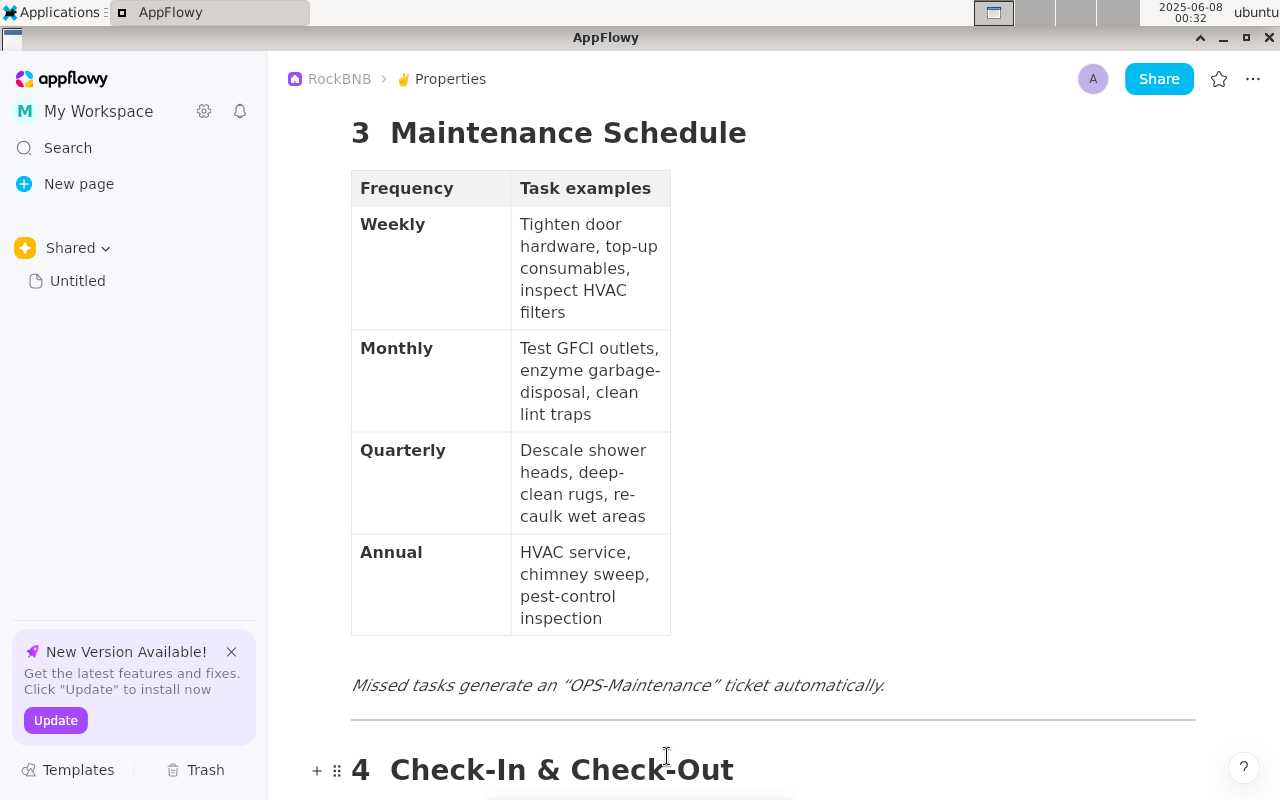

========= Step 9 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844da312a48819f8151544ee921401f0512ae7f9cc047fc', 'created_at': 1749342769.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da34ed38819f8e52457ba2ff9bce0512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da35fd04819f8e2aa632775279730512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 63, 'y': 141}, 'call_id': 'call_5w30y8lIclf22xjOSnmJYKOB', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_684

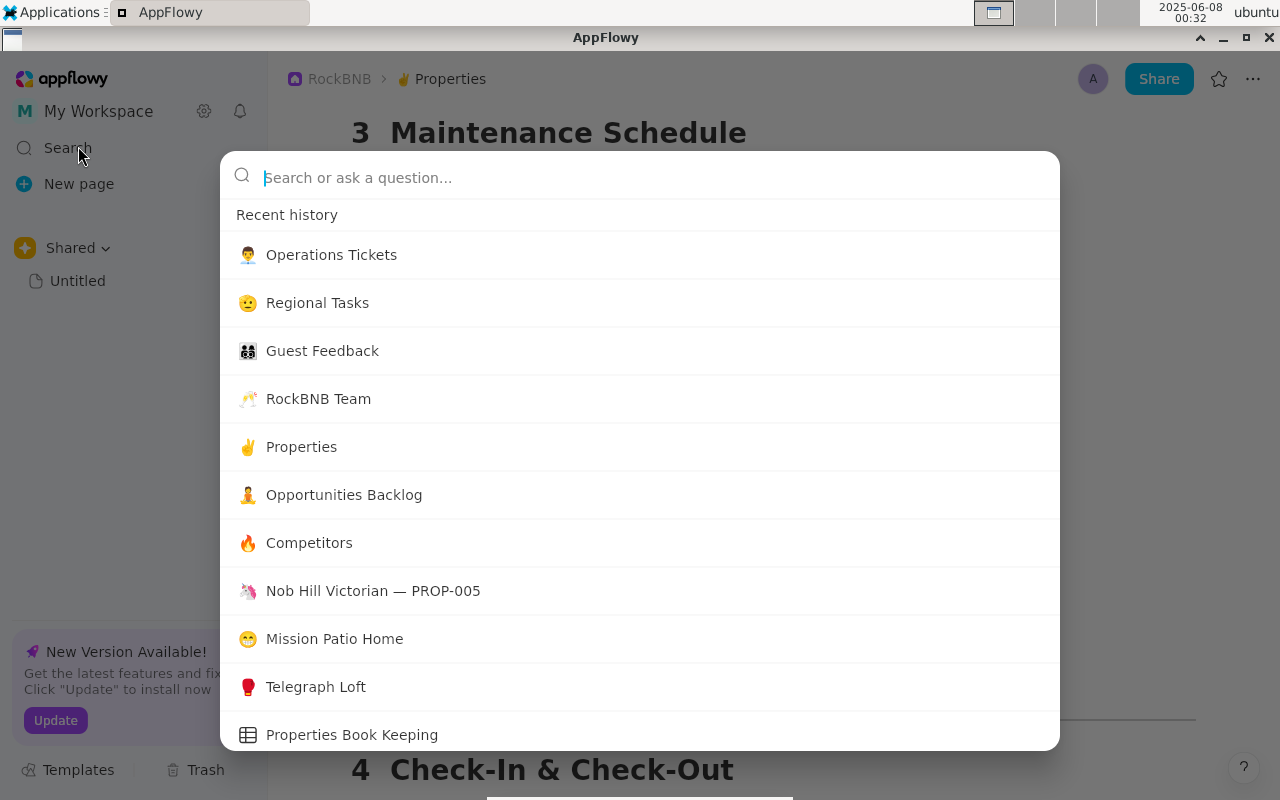

========= Step 10 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844da3d6b50819fa6ddcad7054927a70512ae7f9cc047fc', 'created_at': 1749342781.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da415e78819fa78da624f8e419000512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da422e0c819fb65cc2f297ae0b0f0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 288, 'y': 705}, 'call_id': 'call_ygyLA6Wc82XBxDGy9kzkdbj9', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6

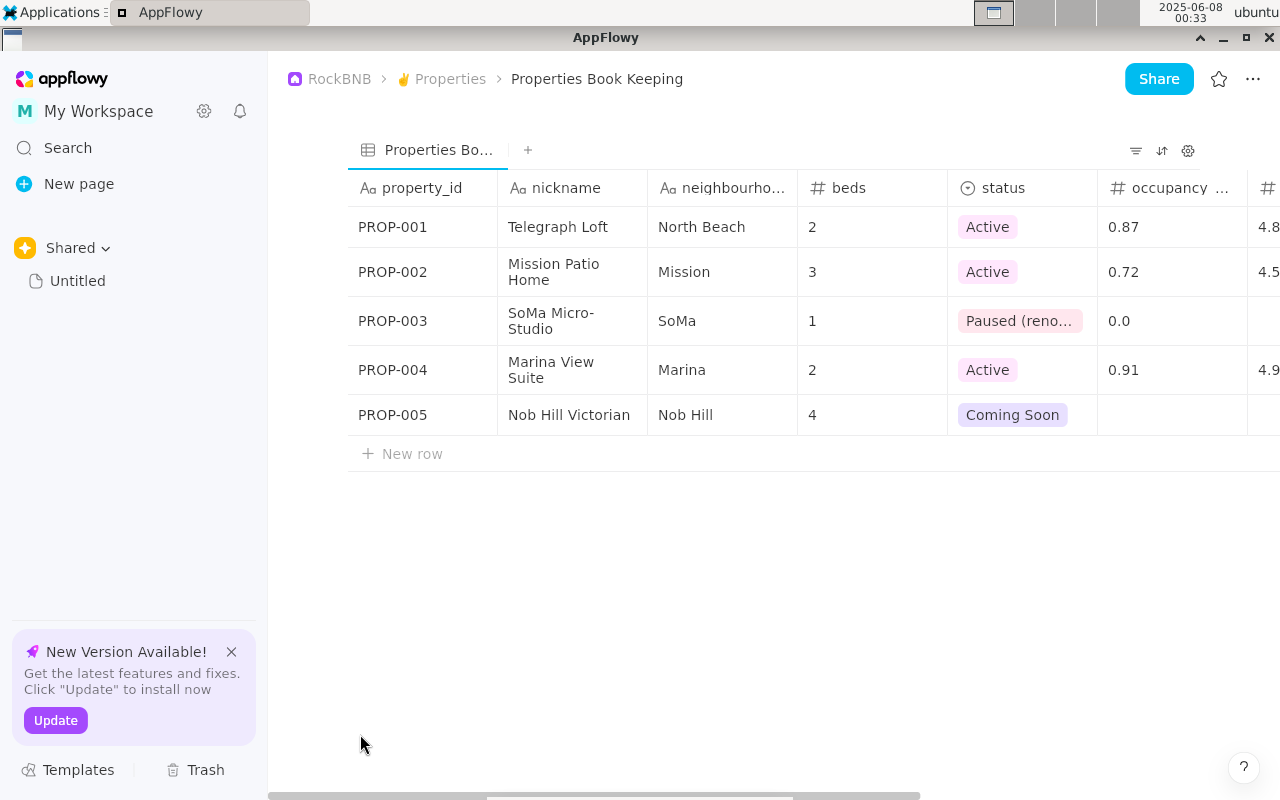

========= Step 11 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844da494f98819f8ad551663c206ea70512ae7f9cc047fc', 'created_at': 1749342793.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da4e2a24819f818a435dd98d45910512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da4f6020819faad184d06f08edba0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 316, 'y': 441}, 'call_id': 'call_J6bX2F5IYvk9XB8rgIKrdNTb', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6

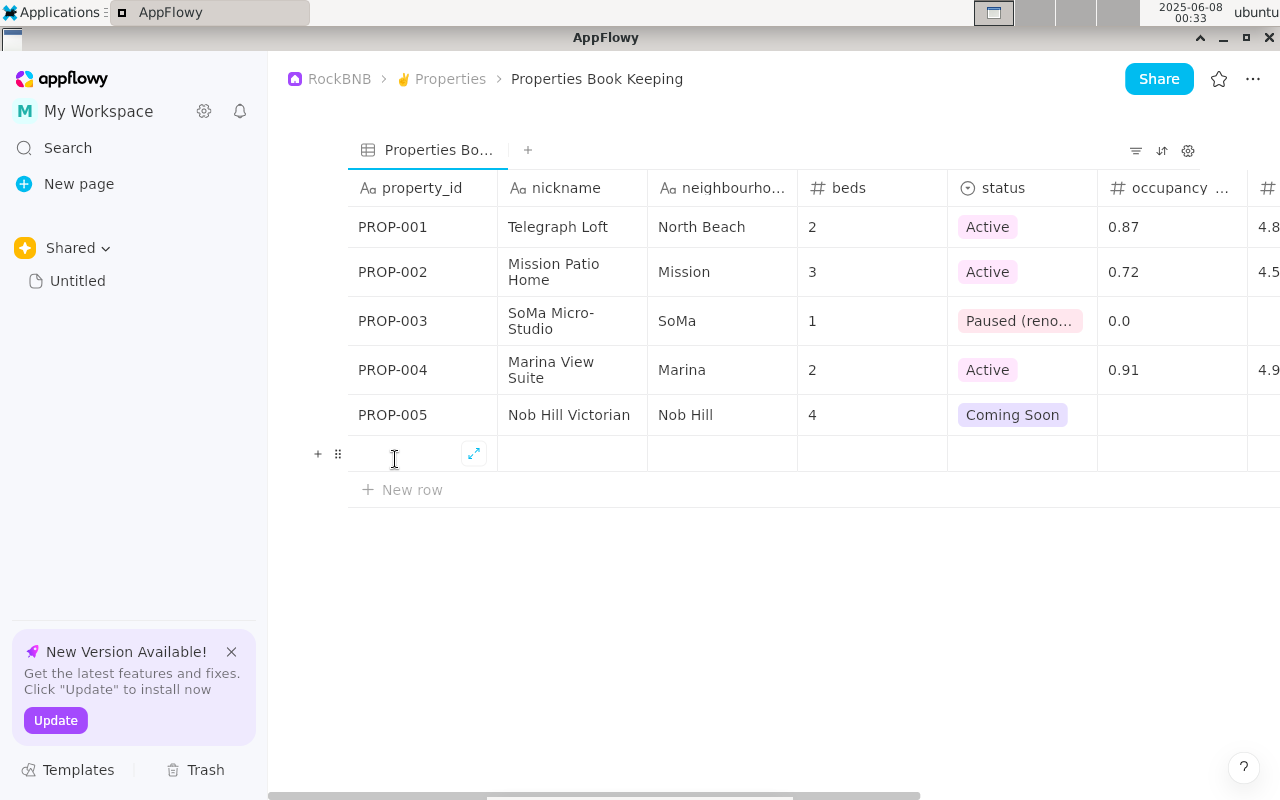

========= Step 12 =========
Agent's action: [TypeAction(type='type', logs={'id': 'resp_6844da56b254819f83ca41c15cc459760512ae7f9cc047fc', 'created_at': 1749342806.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da5a9ad8819fb1e5df98c49c90cd0512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da5b3d98819fa0dbfe858ecb14bf0512ae7f9cc047fc', 'action': {'text': 'PROP-007', 'type': 'type'}, 'call_id': 'call_eERpE40SuBejnFYRFcjrc0Ea', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844da494f98819f8ad551

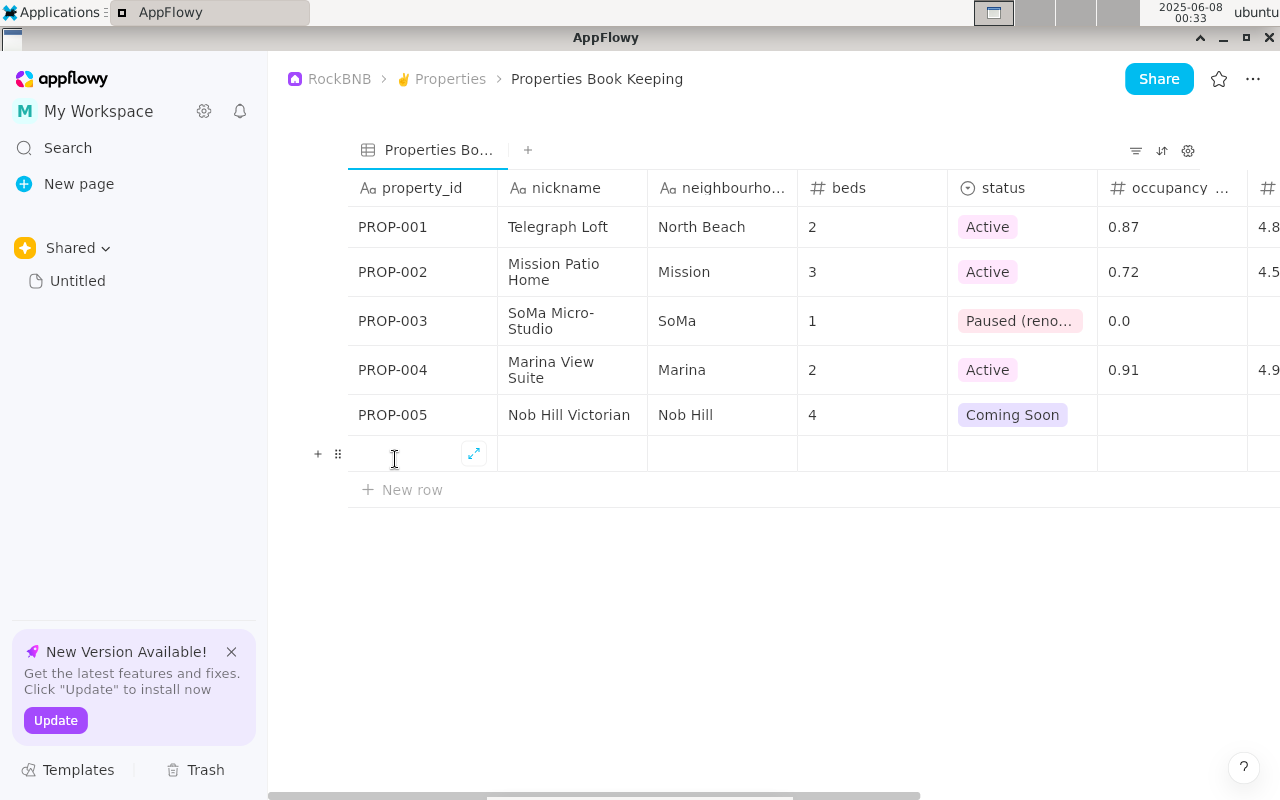

========= Step 13 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844da622fd4819fade7c148c3654fd80512ae7f9cc047fc', 'created_at': 1749342818.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844da65c798819f861186d06ac1e56a0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 292, 'y': 434}, 'call_id': 'call_5zqaVqLGhiAdcZhU72ts0SYd', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844da56b254819f83ca41c15cc459760512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier'

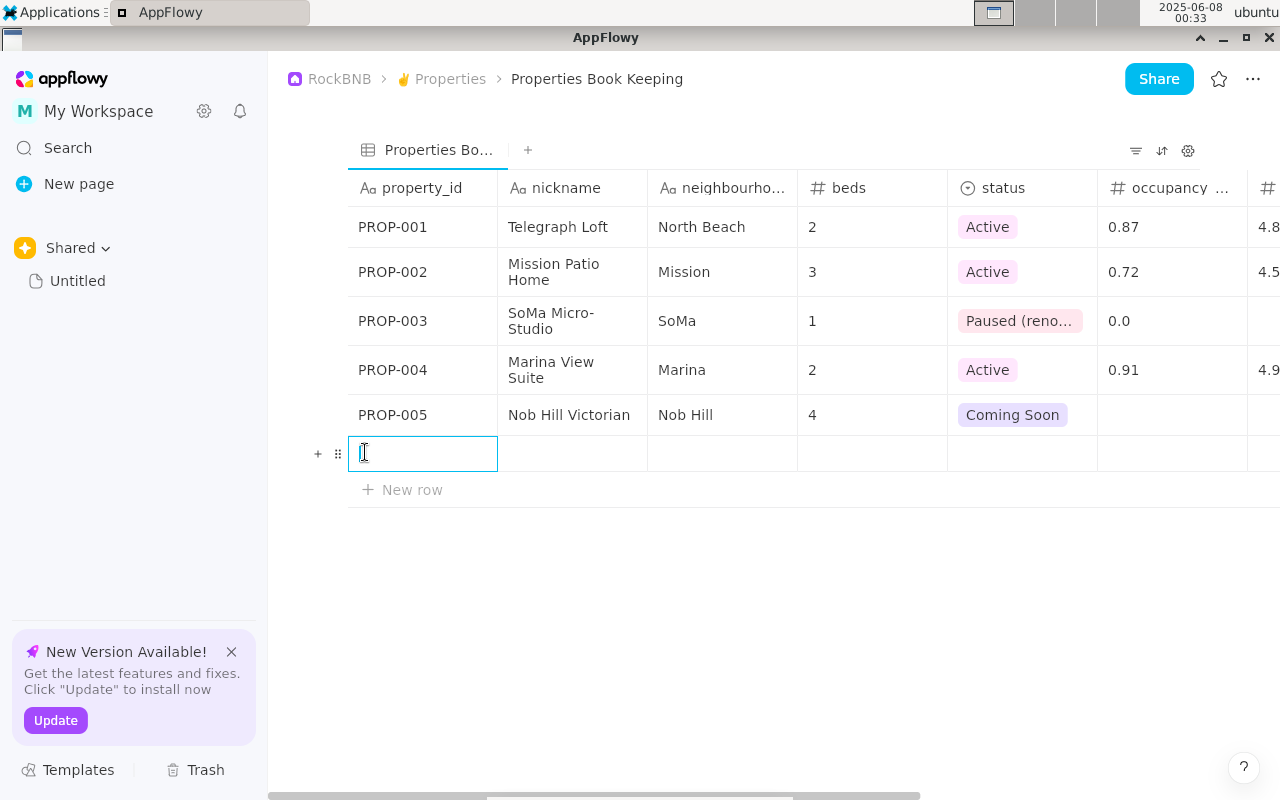

========= Step 14 =========
Agent's action: [TypeAction(type='type', logs={'id': 'resp_6844da6d2604819f80b054a19a7dec9f0512ae7f9cc047fc', 'created_at': 1749342829.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844da718204819f9cb31efdd8b891760512ae7f9cc047fc', 'action': {'text': 'PROP-007', 'type': 'type'}, 'call_id': 'call_4d05No8KhH68bUzJeXBTuRx7', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844da622fd4819fade7c148c3654fd80512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status'

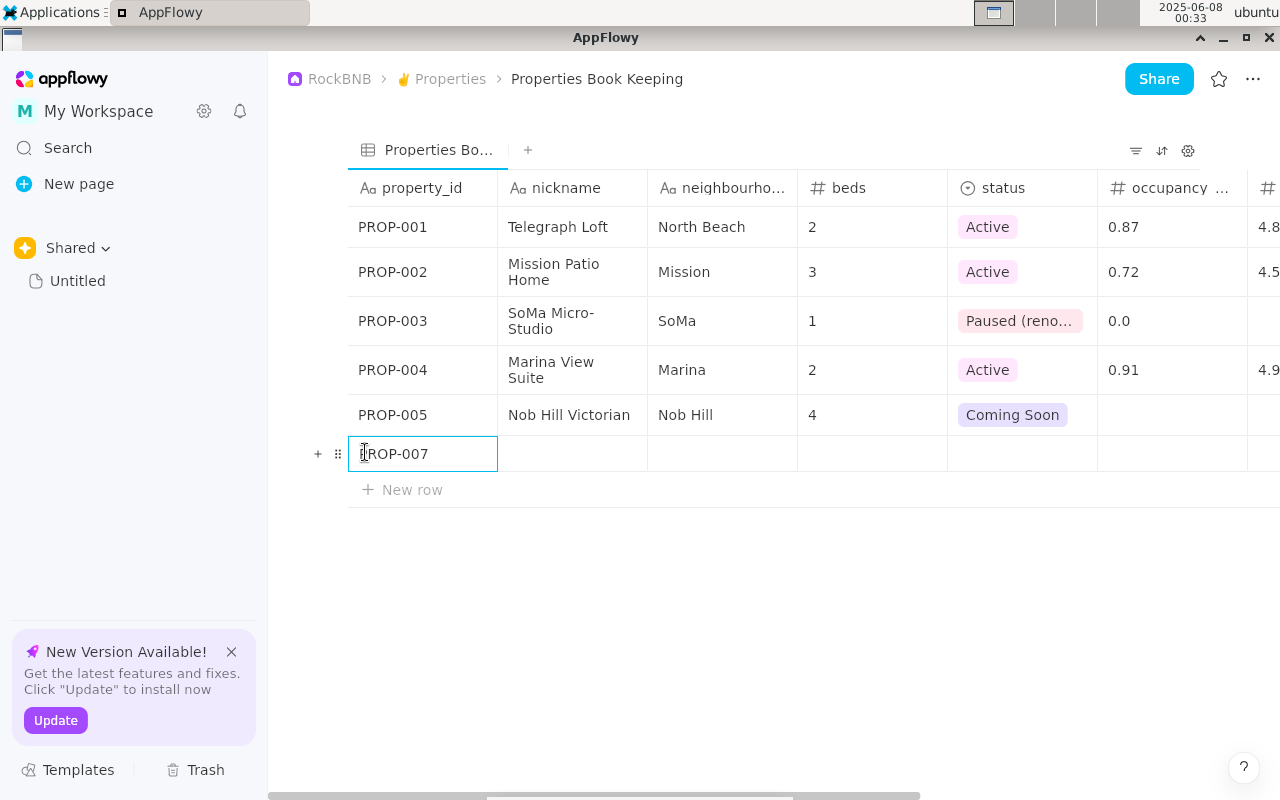

========= Step 15 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844da790ab8819f97942c1db90ec2b00512ae7f9cc047fc', 'created_at': 1749342841.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da7d032c819f9c0d2035891fd1a50512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da7dddb4819f91d3cda81f85c84b0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 460, 'y': 437}, 'call_id': 'call_VfaVhEumn11SQbXPncErFxbV', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6

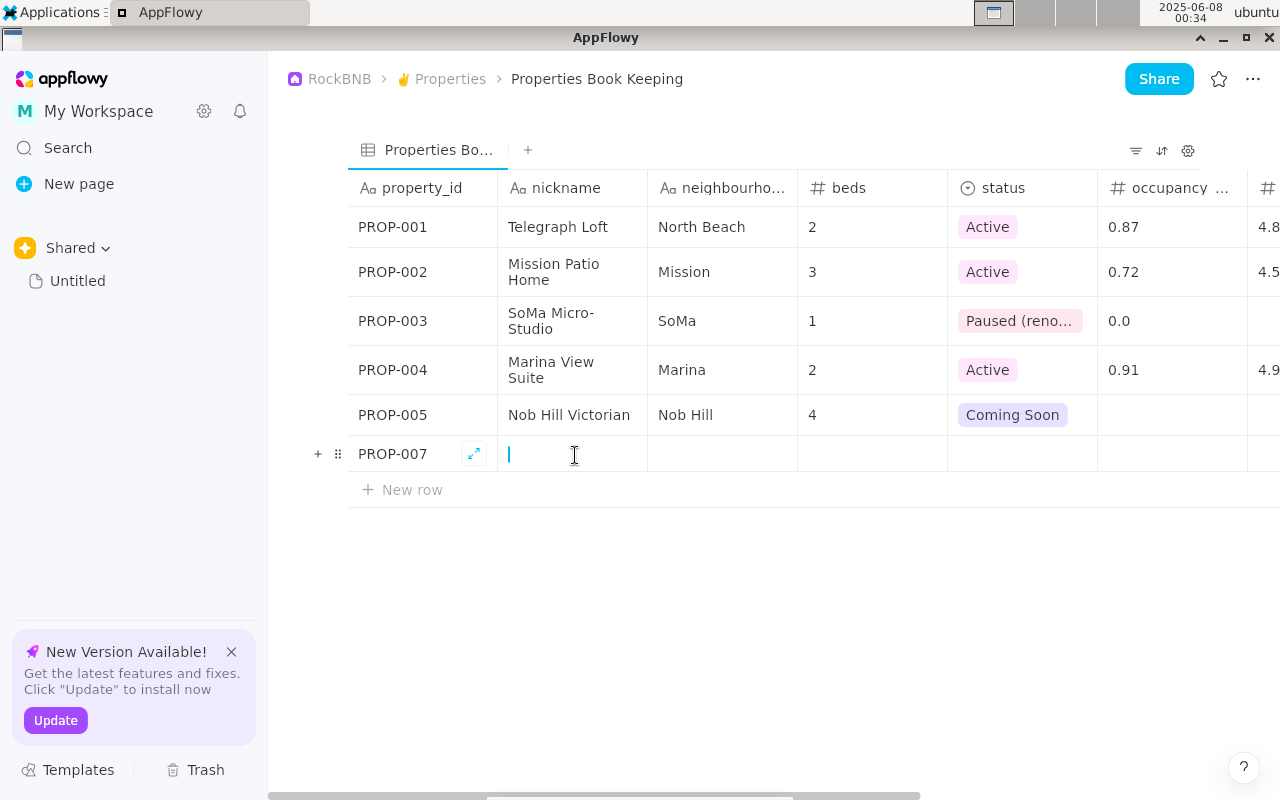

========= Step 16 =========
Agent's action: [TypeAction(type='type', logs={'id': 'resp_6844da8527e8819f9a978bf54bb8856b0512ae7f9cc047fc', 'created_at': 1749342853.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844da89255c819f8e4a22632874322b0512ae7f9cc047fc', 'action': {'text': 'Richmond Garden House', 'type': 'type'}, 'call_id': 'call_exTlRizOYQjIgFYz5zM0DdFT', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844da790ab8819f97942c1db90ec2b00512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'defau

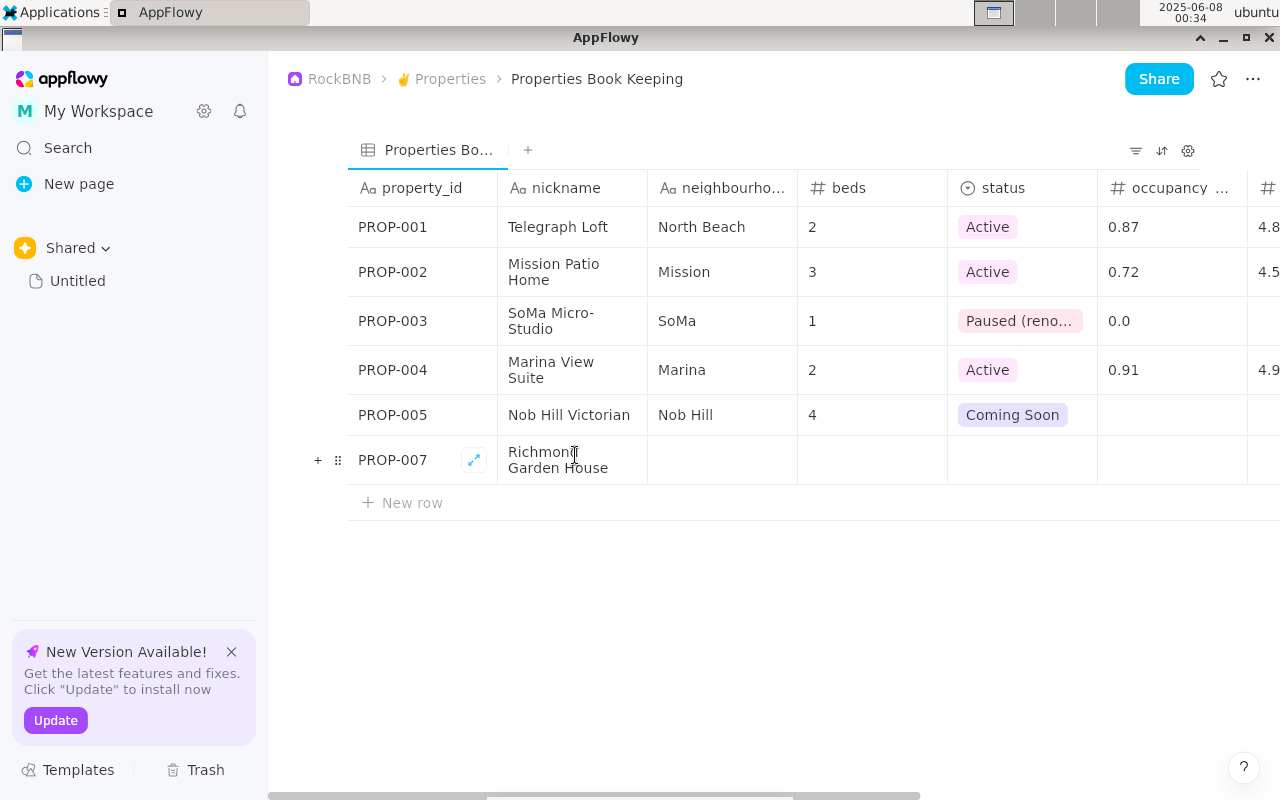

========= Step 17 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844da907f70819fbb1cb7e7704bd8da0512ae7f9cc047fc', 'created_at': 1749342864.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844da949c74819fac3e05d698048dd10512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844da950ed4819fb0b303d4444fb75e0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 569, 'y': 441}, 'call_id': 'call_kS2H4svgkcuJMmBZpRAoEnnQ', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6

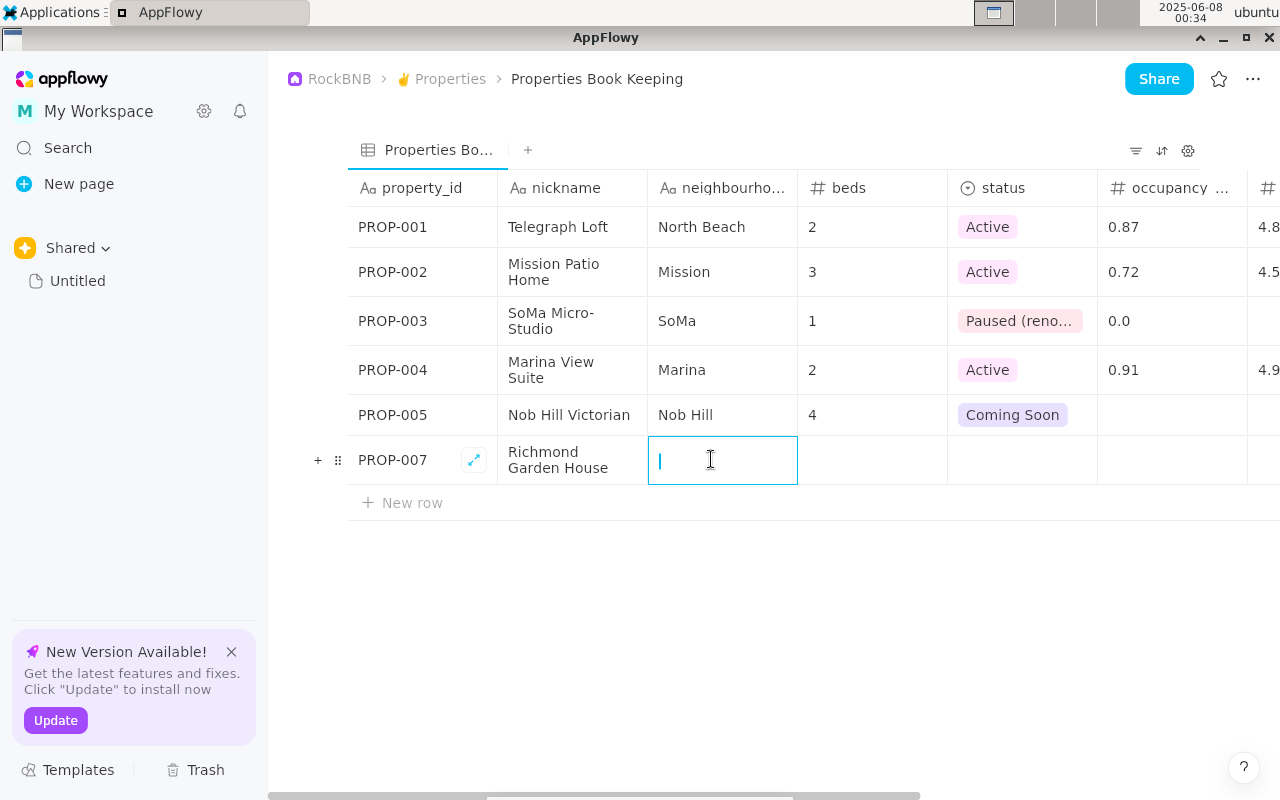

========= Step 18 =========
Agent's action: [TypeAction(type='type', logs={'id': 'resp_6844da9c9574819fbe34500529d821520512ae7f9cc047fc', 'created_at': 1749342876.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844daa04624819fae3c4496735bab120512ae7f9cc047fc', 'action': {'text': 'Richmond', 'type': 'type'}, 'call_id': 'call_79jDYmAIzhuDmHK8XqHTG51J', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844da907f70819fbb1cb7e7704bd8da0512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status'

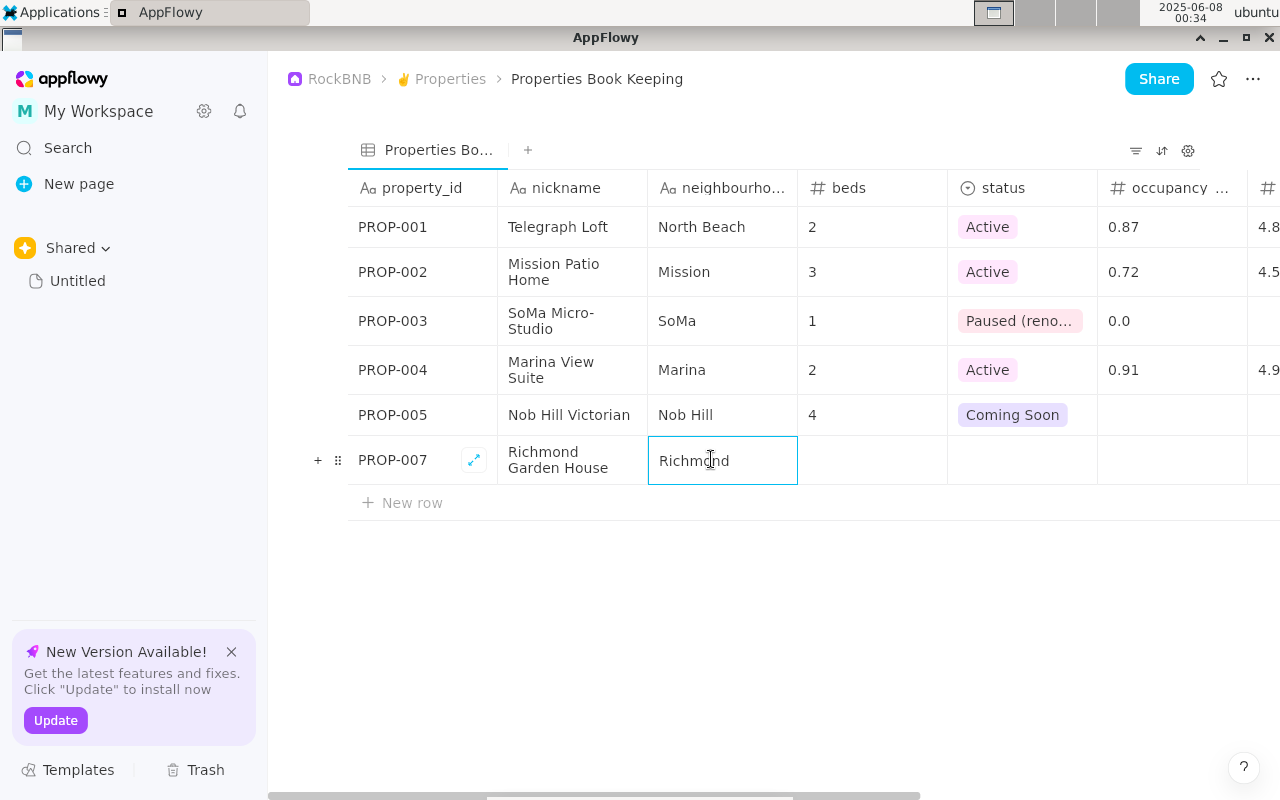

========= Step 19 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844daa7a0f0819fbfd73651e2094d560512ae7f9cc047fc', 'created_at': 1749342887.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844daab16a4819fbdc8d343c5c471600512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844daab8a34819fb87cbaf8c21150300512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 654, 'y': 434}, 'call_id': 'call_dJsJIX93jdwi3rwSStrvVEu7', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6

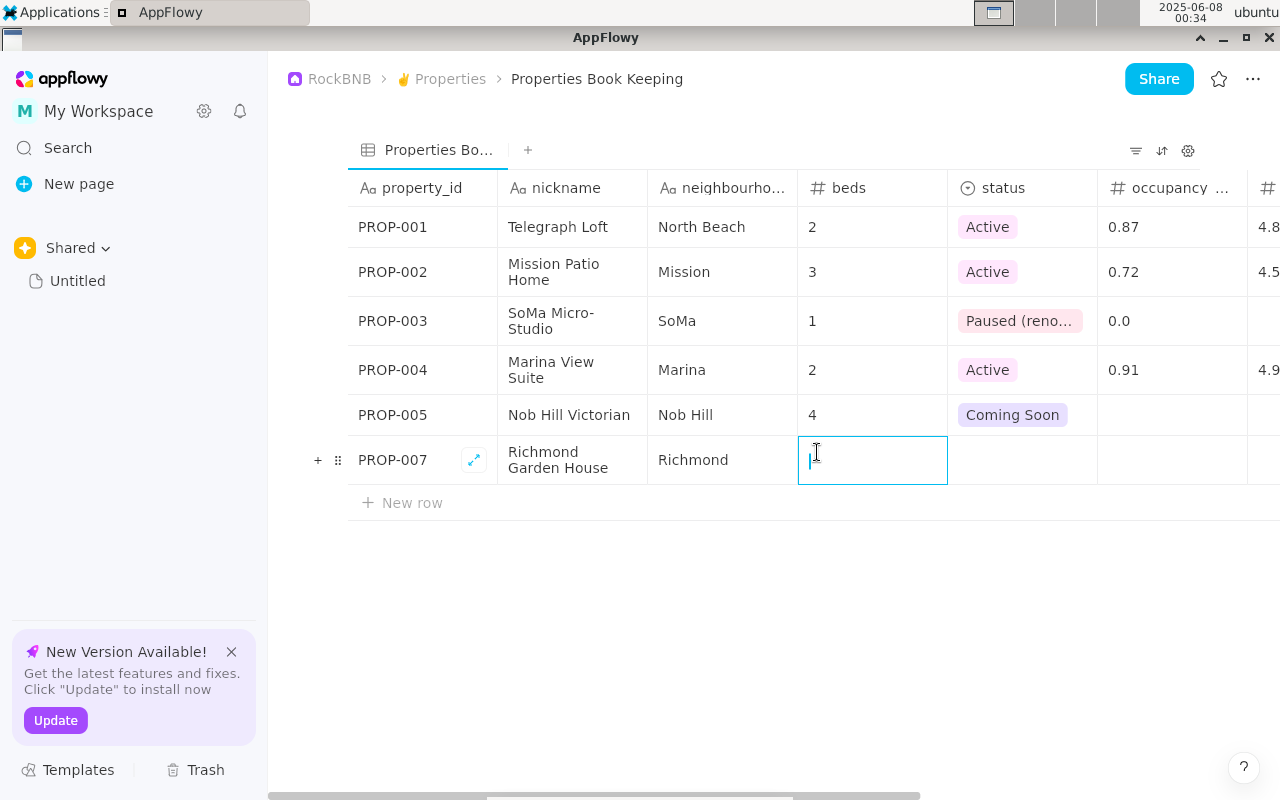

========= Step 20 =========
Agent's action: [TypeAction(type='type', logs={'id': 'resp_6844dab3bdc0819fb88f97ff1afe16260512ae7f9cc047fc', 'created_at': 1749342899.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844dab87a7c819f91d765c09cd3f49d0512ae7f9cc047fc', 'action': {'text': '3', 'type': 'type'}, 'call_id': 'call_6IlY83yLuKoD1BznvAwq75e5', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844daa7a0f0819fbfd73651e2094d560512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status': 'comp

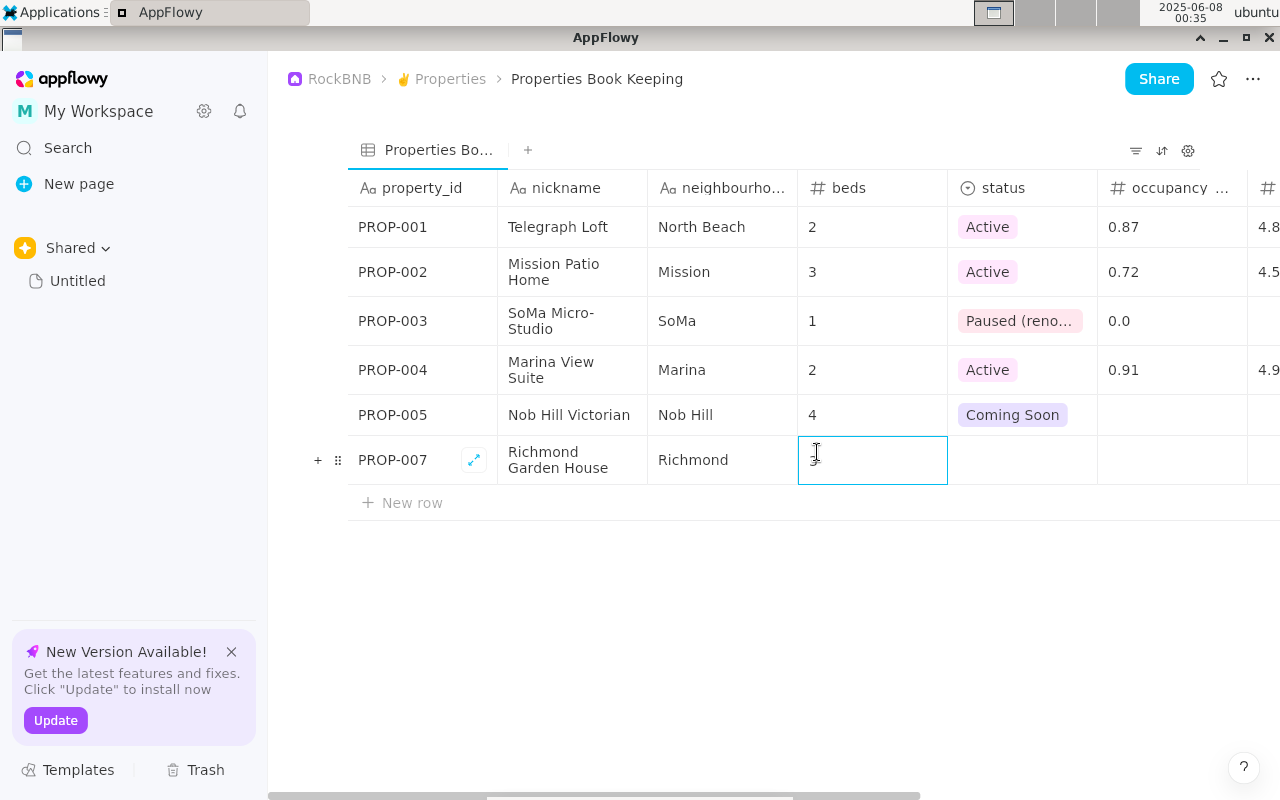

========= Step 21 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844dabfe700819f9828540c2cf45e920512ae7f9cc047fc', 'created_at': 1749342912.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844dac3c654819fb24e3765c1ba95290512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844dac3f944819fb3ec3d77e0862d0b0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 804, 'y': 445}, 'call_id': 'call_d5RJC1MlATyUe1N3z8o0PaFn', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6

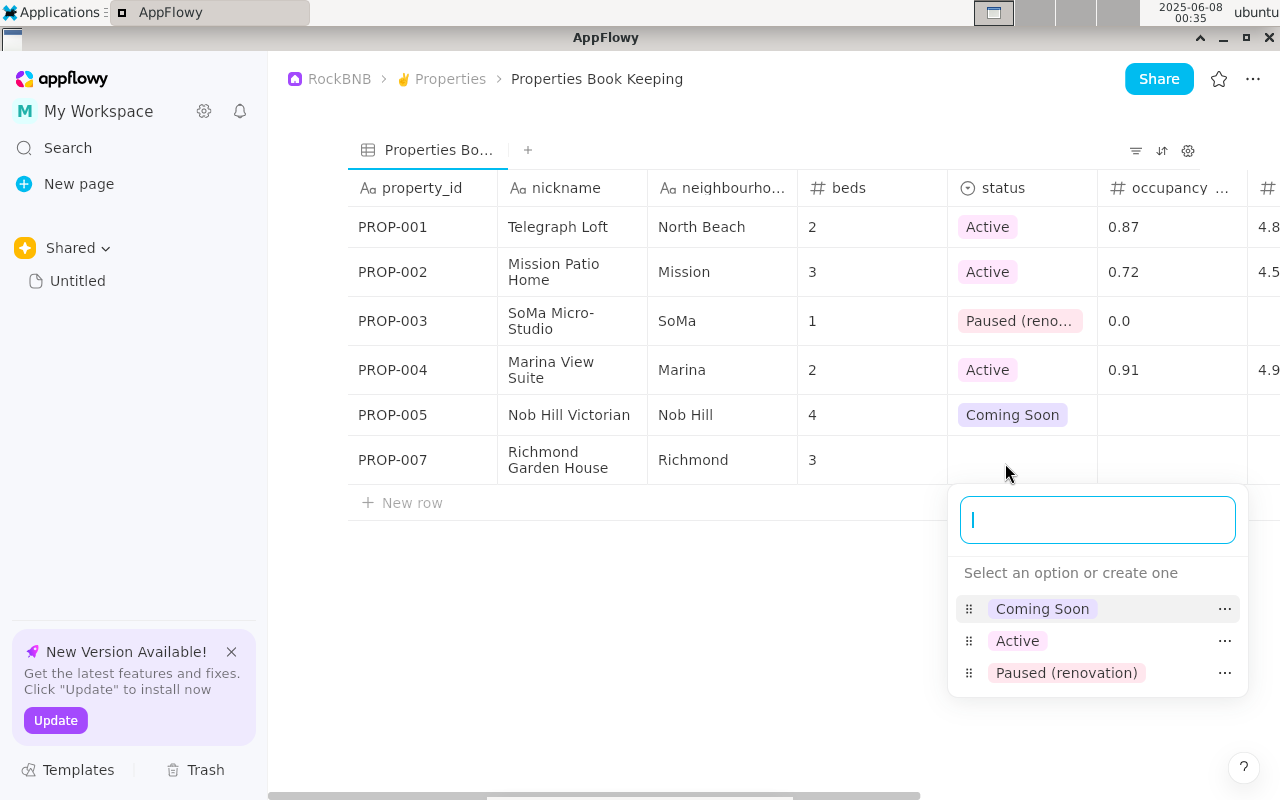

========= Step 22 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844dacbafd0819faf939954b42bd7600512ae7f9cc047fc', 'created_at': 1749342923.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844dacfdb58819fbdfa78f8d3ae493e0512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844dad0406c819fa79ddfbdb2ca94800512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 820, 'y': 617}, 'call_id': 'call_CbFZJei4RV2ZiE6CVX7lEKgp', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6

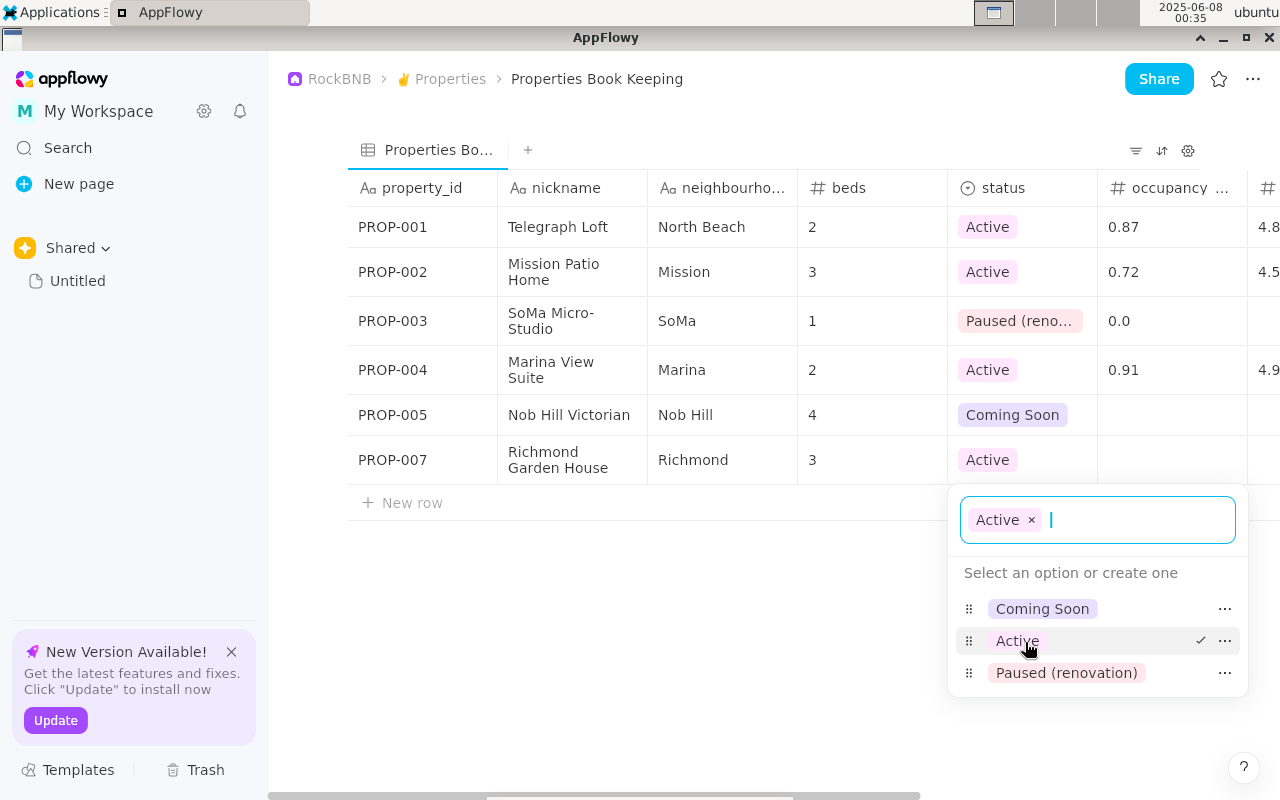

========= Step 23 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844dad80f2c819f97d1b31a892eaac10512ae7f9cc047fc', 'created_at': 1749342936.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844dadc6f48819f908b5d8d8713d1960512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 822, 'y': 514}, 'call_id': 'call_kh6YvIi4f3Je8xIg4qFekoDD', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844dacbafd0819faf939954b42bd7600512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier'

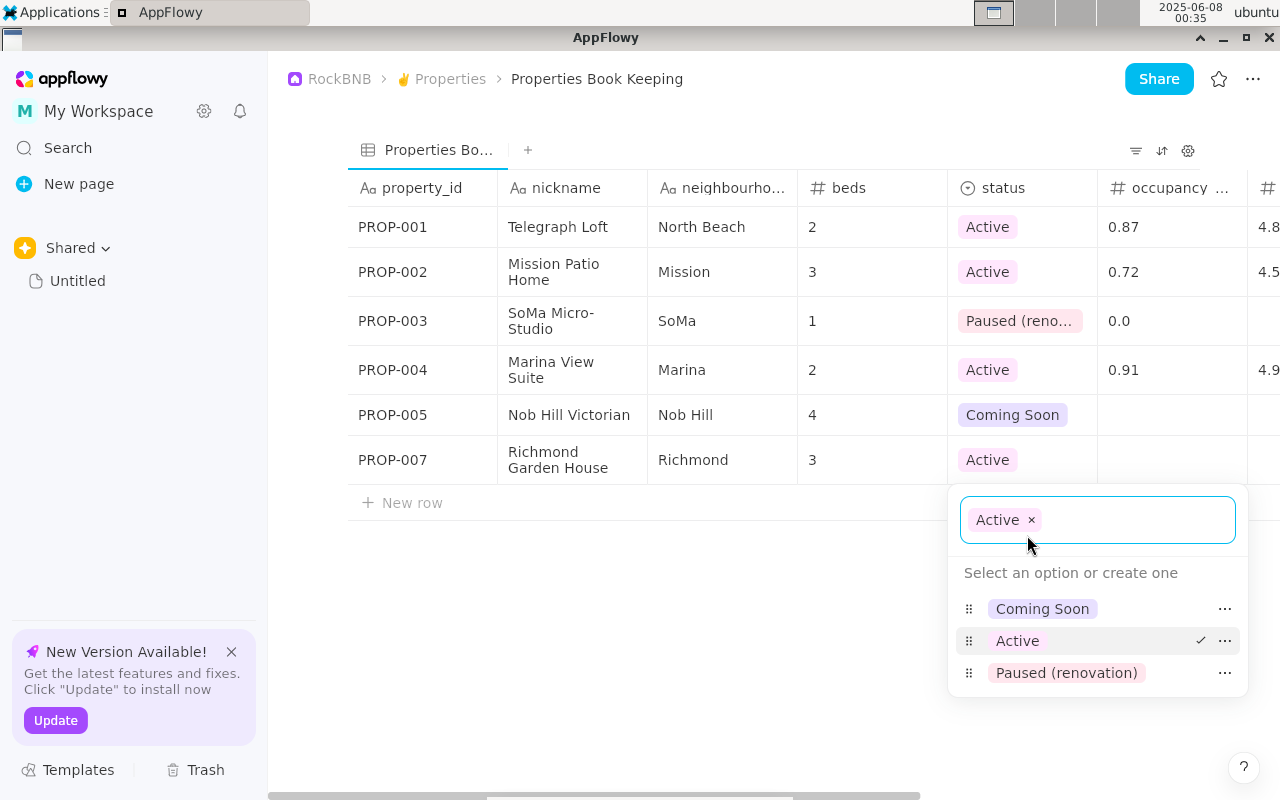

========= Step 24 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844dae44480819f96af4a1374c138fd0512ae7f9cc047fc', 'created_at': 1749342950.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844dae9cc00819f837583ab6c0ef7e40512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844daea43b8819f93ad725eaee12fc40512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 928, 'y': 440}, 'call_id': 'call_7kUAd7UNFB1QBIsQwZqfGalG', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6

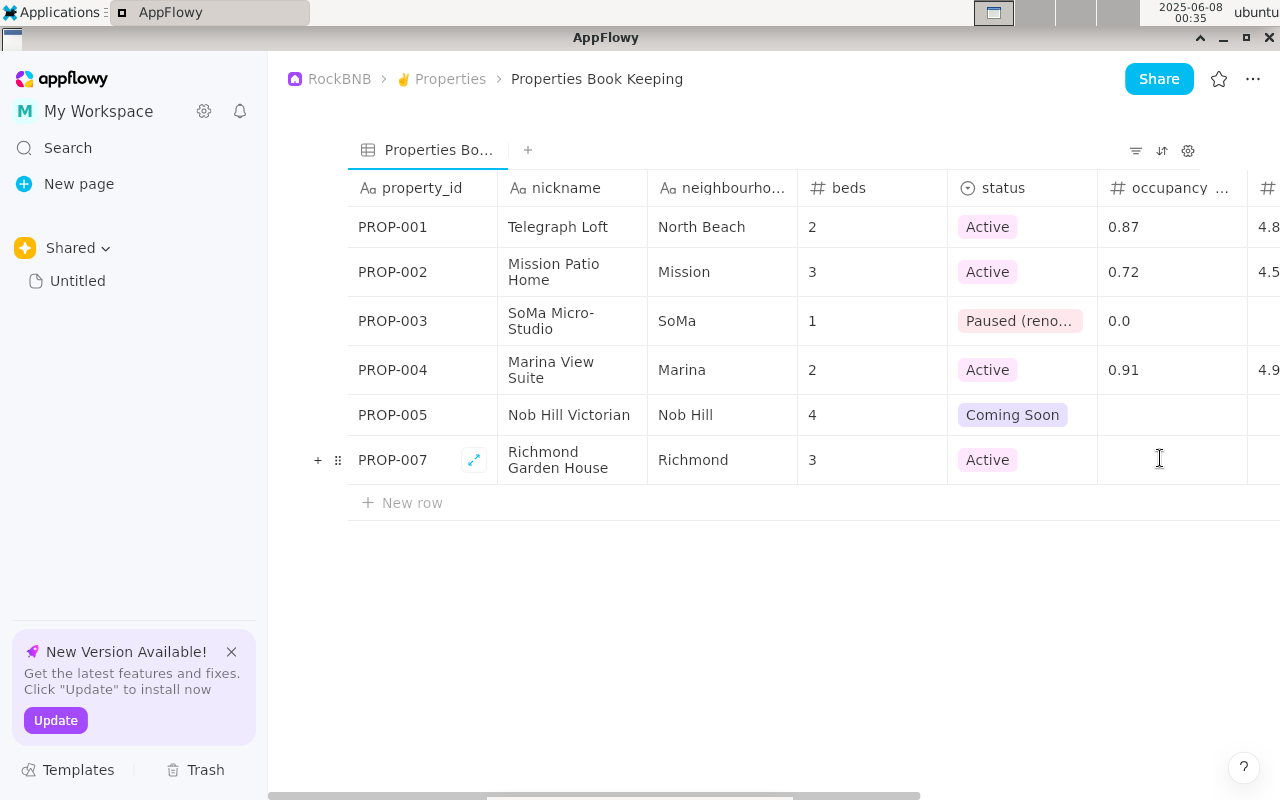

========= Step 25 =========
Agent's action: [TypeAction(type='type', logs={'id': 'resp_6844daf23b04819f8b723976181358460512ae7f9cc047fc', 'created_at': 1749342962.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844daf6a198819fa1725c1370ad42240512ae7f9cc047fc', 'action': {'text': '0.78', 'type': 'type'}, 'call_id': 'call_TaiaLpQ73a9j4iGaAhnc5QGK', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844dae44480819f96af4a1374c138fd0512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status': 'c

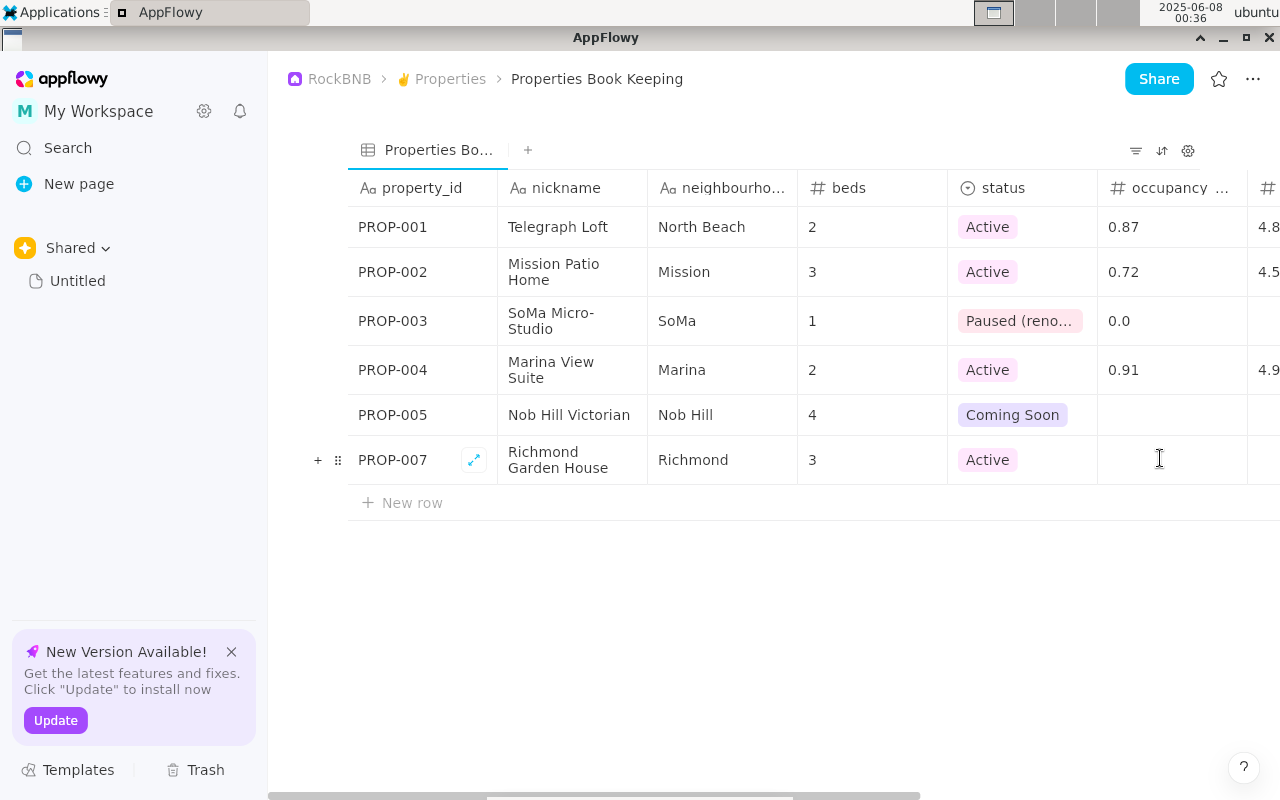

========= Step 26 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844dafeaae0819f87ef3ef35640b64f0512ae7f9cc047fc', 'created_at': 1749342974.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844db035d1c819fb198a520f01e2dca0512ae7f9cc047fc', 'action': {'type': 'double_click', 'x': 932, 'y': 444}, 'call_id': 'call_MjgwSwTvoa8yH8hOsb0j3Dsw', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844daf23b04819f8b723976181358460512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default'

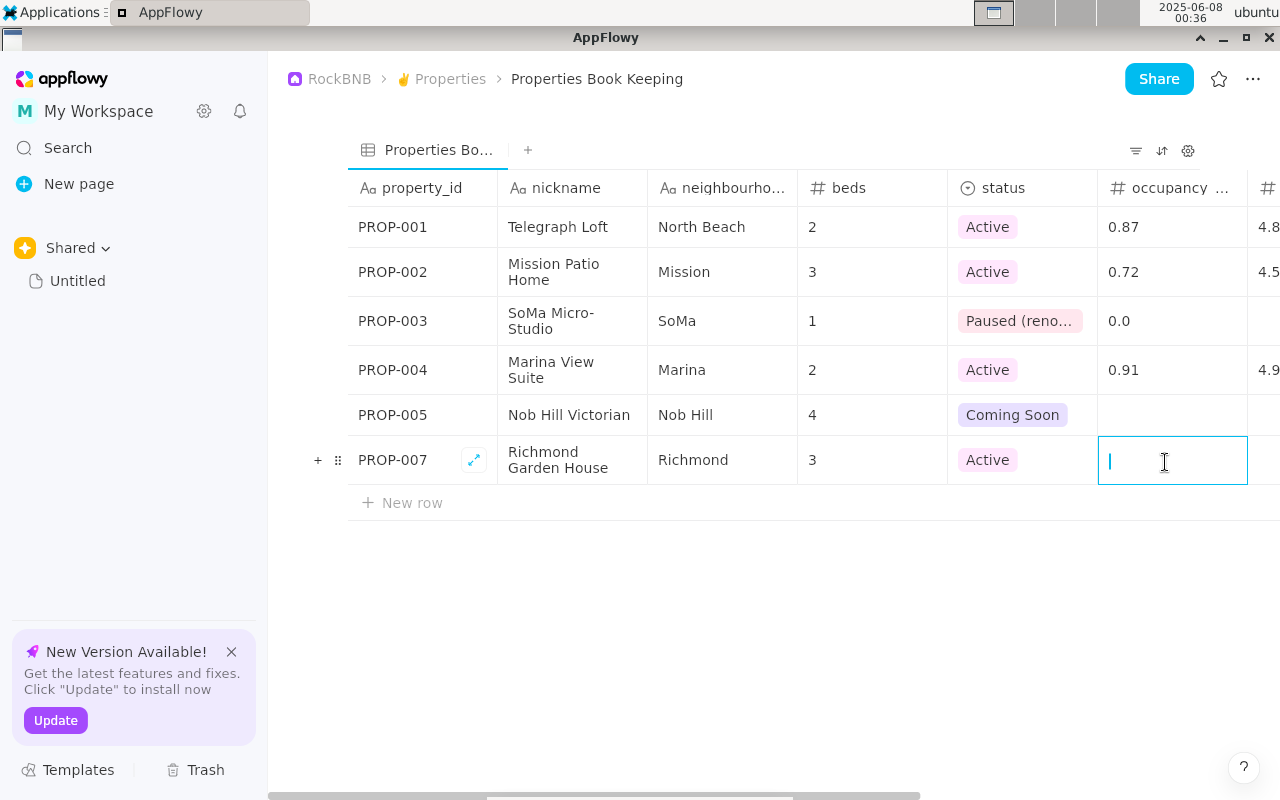

========= Step 27 =========
Agent's action: [TypeAction(type='type', logs={'id': 'resp_6844db0bcd74819f8ea91827e784e5210512ae7f9cc047fc', 'created_at': 1749342987.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844db0fa9a0819fbe9b051fc1497b5b0512ae7f9cc047fc', 'action': {'text': '0.78', 'type': 'type'}, 'call_id': 'call_8jZr0LZBvyQfhzt3PdZqVgZW', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844dafeaae0819f87ef3ef35640b64f0512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status': 'c

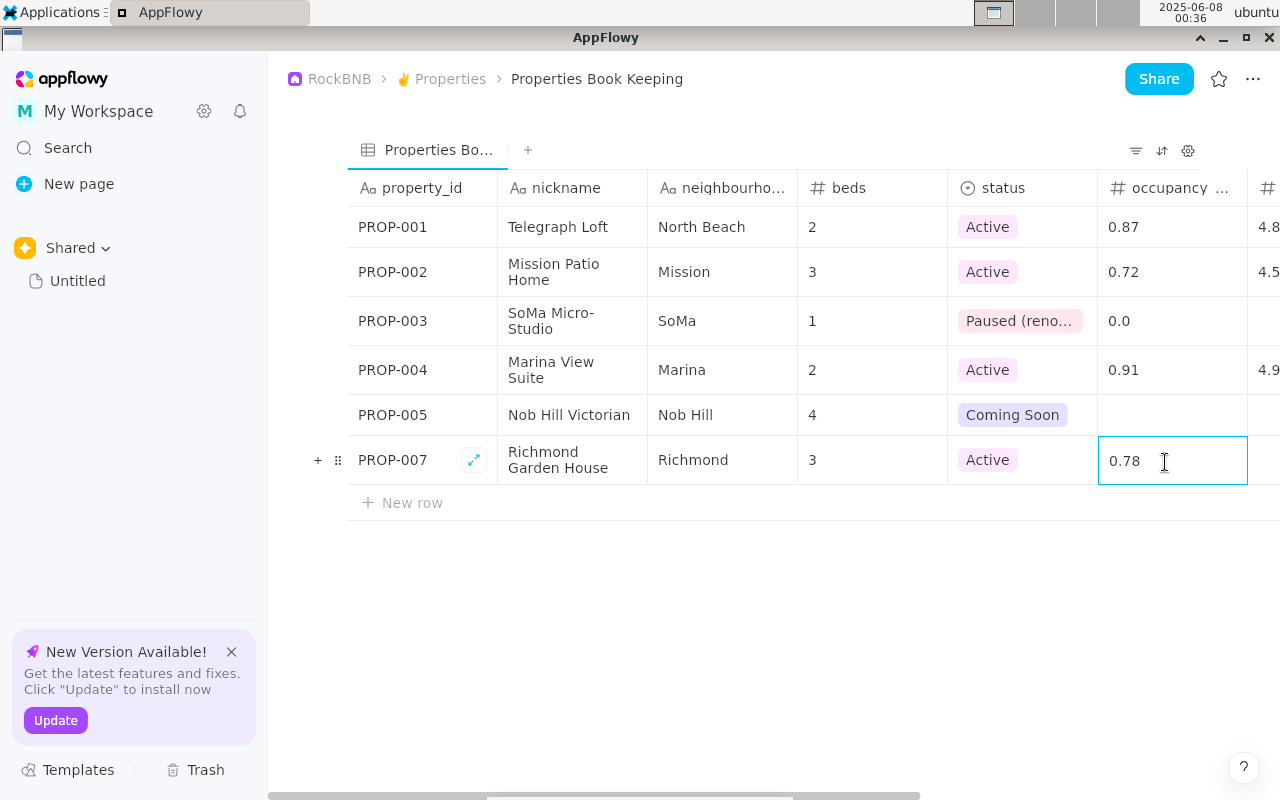

========= Step 28 =========
Agent's action: [ClickAction(type='click', logs={'id': 'resp_6844db17b5c0819fb788670549681b890512ae7f9cc047fc', 'created_at': 1749342999.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844db1b3a08819fa8908661356054450512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844db1b7bc8819fb778f48a804c5f7a0512ae7f9cc047fc', 'action': {'button': 'left', 'type': 'click', 'x': 1010, 'y': 442}, 'call_id': 'call_5cebCQuL2waY3hnldr6X8mvw', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_

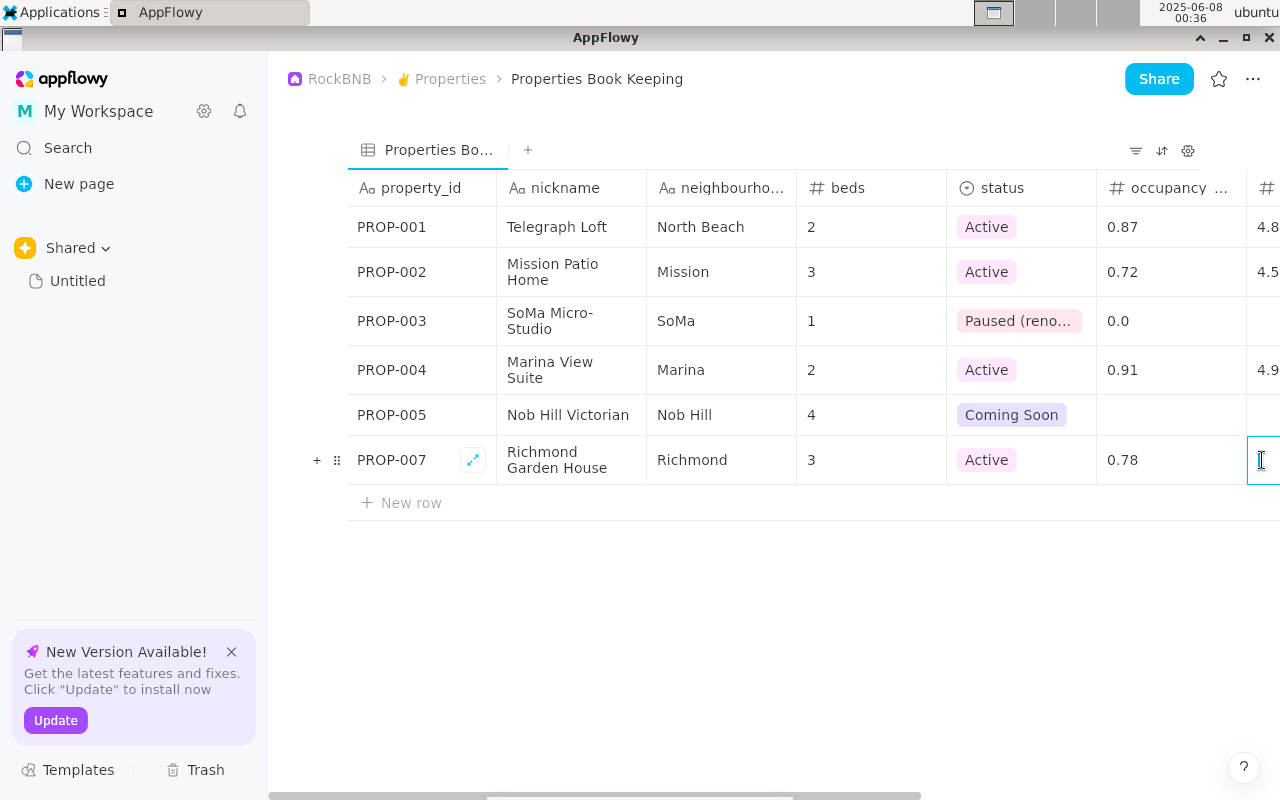

========= Step 29 =========
Agent's action: [TypeAction(type='type', logs={'id': 'resp_6844db241e5c819fa7745136055608ce0512ae7f9cc047fc', 'created_at': 1749343012.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'cu_6844db287240819fb6dd35d34113bea50512ae7f9cc047fc', 'action': {'text': '4.72', 'type': 'type'}, 'call_id': 'call_Y310gSvUjDbt7O4akBtrbFyC', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_response_id': 'resp_6844db17b5c0819fb788670549681b890512ae7f9cc047fc', 'reasoning': {'effort': 'medium', 'generate_summary': None, 'summary': None}, 'service_tier': 'default', 'status': 'c

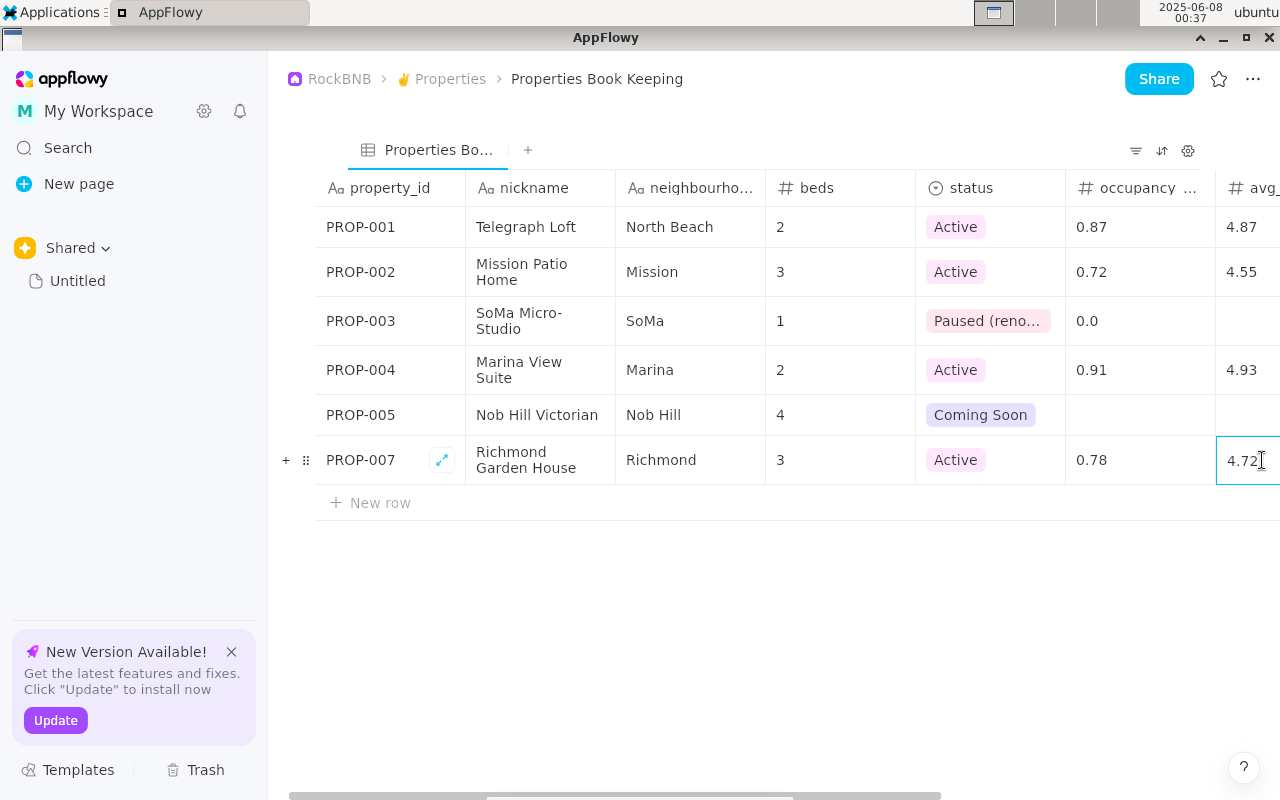

========= Step 30 =========
Agent's action: [ScrollAction(type='scroll', logs={'id': 'resp_6844db307dfc819f82cd098254f409ba0512ae7f9cc047fc', 'created_at': 1749343024.0, 'error': None, 'incomplete_details': None, 'instructions': None, 'metadata': {}, 'model': 'computer-use-preview-2025-03-11', 'object': 'response', 'output': [{'id': 'rs_6844db33ea94819faedf91afd8dfde1f0512ae7f9cc047fc', 'summary': [], 'type': 'reasoning', 'encrypted_content': None, 'status': None}, {'id': 'cu_6844db380fb0819fb484f95672f1525c0512ae7f9cc047fc', 'action': {'scroll_x': 393, 'scroll_y': 0, 'type': 'scroll', 'x': 910, 'y': 508}, 'call_id': 'call_Zms1GmErTqzULjm98d0JS2o0', 'pending_safety_checks': [], 'status': 'completed', 'type': 'computer_call'}], 'parallel_tool_calls': True, 'temperature': 1.0, 'tool_choice': 'auto', 'tools': [{'display_height': 768, 'display_width': 1024, 'environment': 'linux', 'type': 'computer_use_preview'}], 'top_p': 1.0, 'background': False, 'max_output_tokens': None, 'previous_resp

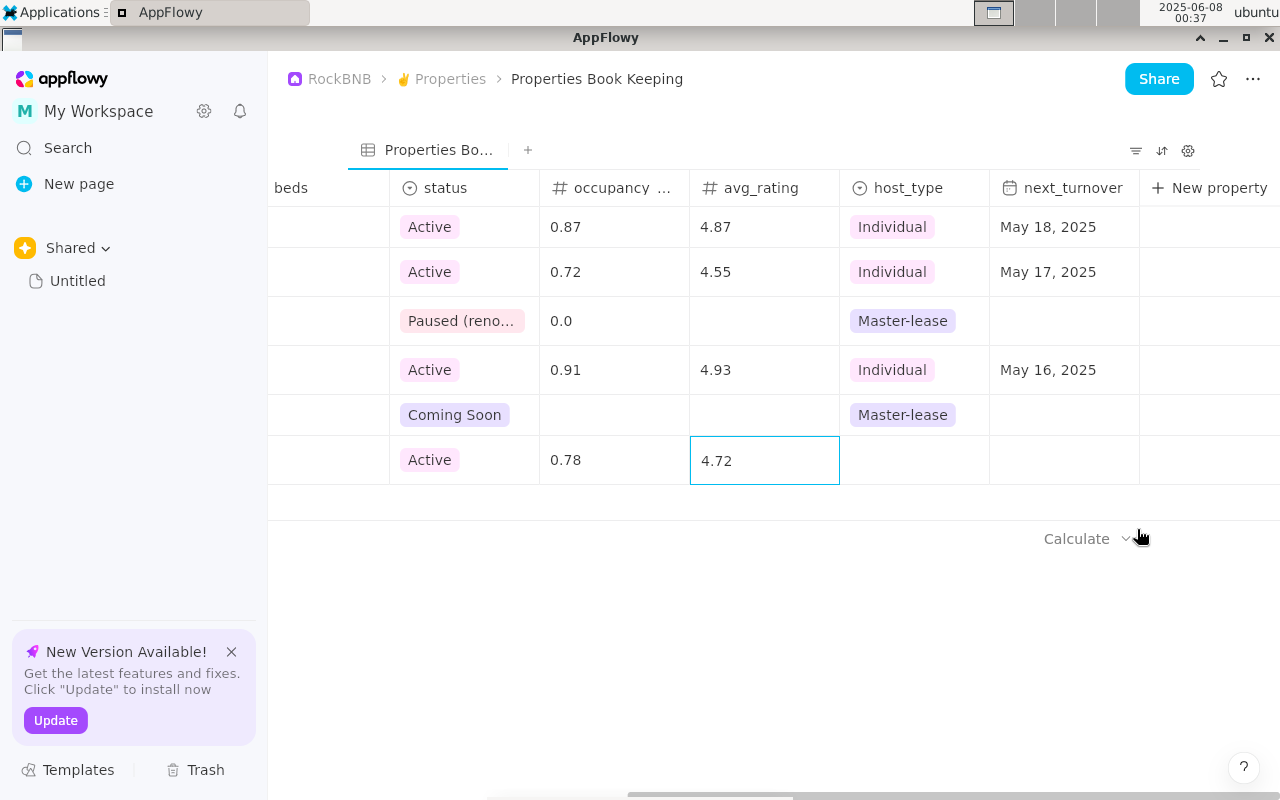

In [4]:
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display

for i in range(30):
    print(f"========= Step {i + 1} =========")
    action, done = await agent.predict(obs)
    print(f"Agent's action: {action}")

    obs, reward, terminated, info = await env.step(action)

    if obs.screenshot:
        screenshot = base64.b64decode(obs.screenshot)
        image = Image.open(BytesIO(screenshot))
        display(image)

    if done or terminated:
        break

In [5]:
result = await env.evaluate()
print(result)

0.8068888888888889


In [6]:
await env.close()